# Оглавление
1. [Общая информация](#Шаг_1)
    1. [Чтение из файла.](#Шаг_1.1)
    2. [Просмотр наименований столбцов columns()](#Шаг_1.2)
    3. [Просмотр на дубликаты duplicated()](#Шаг_1.3)
    4. [Просмотр с помощью describe()](#Шаг_1.4)
    5. [Просмотр с помощью info()](#Шаг_1.5)
    6. [Вывод](#Шаг_1.6)
2. [Подготовка данных](#Шаг_2)
    1. [Замена названий столбцов](#Шаг_2.1)
    2. [Преобразование данных в нужные типы.](#Шаг_2.2)
    3. [Обработка пропусков](#Шаг_2.3)
    4. [Суммарные продажи во всех регионах](#Шаг_2.4)
3. [Исследовательский анализ данных.](#Шаг_3)
    1. [Cколько игр выпускалось в разные годы.](#Шаг_3.1) 
    2. [Изменения продаж по платформам.](#Шаг_3.2) 
    3. [Актуальный период.](#Шаг_3.3)
    4. [Актуальный срез.](#Шаг_3.4)
    5. [Платформы - лидиры по продажам.](#Шаг_3.5)
    6. [График «ящик с усами».](#Шаг_3.6)
    7. [Влияние на продажи внутри одной популярной платформы.](#Шаг_3.7)
    8. [Выводы с продажами игр на других платформах.](#Шаг_3.8)
    9. [Распределение игр по жанрам.](#Шаг_3.9)
4. [Портрет пользователя каждого региона](#Шаг_4)
    1. [Самые популярные платформы (топ-5)](#Шаг_4.1)
    2. [Самые популярные жанры (топ-5).](#Шаг_4.2)
    3. [Рейтинг ESRB](#Шаг_4.3)
5. [Проверка гипотез](#Шаг_5)
    1. [Средние пользовательские рейтинги платформ Xbox One и PC](#Шаг_5.1)
    2. [Средние пользовательские рейтинги жанров Action и Sports](#Шаг_5.2)
6. [Общий вывод](#Шаг_6)

<a name="Шаг_1"></a>

### Файл с данными и общая информация

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pymystem3 import Mystem
m = Mystem()
from collections import Counter
import numpy as np
from scipy import stats as st

<a name="Шаг_1.1"></a>

#### А. Чтение из файла.

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [4]:
df.shape

(16715, 11)

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<a name="Шаг_1.2"></a>

#### B. Просмотр наименований столбцов columns()

In [4]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Редактировать наименования колонок. Привести наименование всех колонок к нижнему регистру.

<a name="Шаг_1.3"></a>

#### C. Просмотр на дубликаты duplicated()

In [5]:
df.duplicated().sum()

0

Дублей нет

<a name="Шаг_1.4"></a>

#### D. Просмотр с помощью describe()

In [6]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<a name="Шаг_1.5"></a>

#### E. Просмотр с помощью info()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


    Name               16713 non-null object   Два пропуска. Тип не менять.
    Platform           16715 non-null object   Пропусков нет. Тип не менять
    Year_of_Release    16446 non-null float64  Пропуски есть. Тип поменять на int64 (проще чем с типом date)
    Genre              16713 non-null object   Два пропуска. Тип не менять
    NA_sales           16715 non-null float64  Пропусков нет. Тип не менять.
    EU_sales           16715 non-null float64  Пропусков нет. Тип не менять.
    JP_sales           16715 non-null float64  Пропусков нет. Тип не менять.
    Other_sales        16715 non-null float64  Пропусков нет. Тип не менять.
    Critic_Score       8137 non-null float64   Пропуски есть. Тип поменять на int64
    User_Score         10014 non-null object   Пропуски есть. Тип поменять на float
    Rating             9949 non-null object    Пропуски есть. Тип не менять.

<a name="Шаг_1.6"></a>

#### F. Вывод

Много пропущенных значений. Есть нулевые значения. Менять наименования колонок и типы данных. Пропущенные значения по возможности заполнить


[Home](#Оглавление)

<a name="Шаг_2"></a>

### Подготовка данных

<a name="Шаг_2.1"></a>

#### Замена названий столбцов (нижний регистр)

In [8]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [9]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [10]:
df = df.rename(str.lower, axis='columns')

In [11]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Преобразование к нижнему регистру 

<a name="Шаг_2.2"></a>

#### Преобразование данных в нужные типы. 

In [12]:
df['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

С типом данных все нормально.

In [13]:
df['year_of_release'].describe()

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [14]:
df['year_of_release'] = df['year_of_release'].fillna('0')

In [15]:
df['year_of_release'] = df['year_of_release'].astype('int')

Тип преобразован в int. Проще работать чем с датой (в этом случае). Нули необходимо заполнить.  До замены занчений 0 не было.

In [16]:
df['critic_score'].value_counts()

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
17.0      1
22.0      1
13.0      1
21.0      1
Name: critic_score, Length: 82, dtype: int64

In [17]:
df['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [18]:
df['critic_score'] = df['critic_score'].fillna('0')

In [19]:
df.loc[df['critic_score'] == '0', 'critic_score'] = -1

In [20]:
df['critic_score'] = df['critic_score'].astype('int')

In [21]:
df['critic_score'].value_counts()

-1     8578
 70     256
 71     254
 75     245
 78     240
       ... 
 20       3
 22       1
 17       1
 13       1
 21       1
Name: critic_score, Length: 83, dtype: int64

Тип преобразован в int. Nan заменен на -1. При дальнейшем рассмотрение не учитывать. До замены занчений 0 не было.

In [22]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
9.6       2
0.7       2
0.5       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [23]:
df['user_score'].describe()

count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

In [24]:
df[df['user_score'] == '0']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008,Adventure,0.66,0.0,0.0,0.06,-1,0,E


Значение 0 в рейтинге только одно. Пренебрегу этой игрой. Буду рассматривать наравне с Nan.

In [25]:
df['user_score'] = df['user_score'].fillna('-1')

In [26]:
df['user_score'].value_counts()

-1     6701
tbd    2424
7.8     324
8       290
8.2     282
       ... 
0.7       2
0.5       2
1.1       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

In [27]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = '-1'

In [28]:
df['user_score'] = df['user_score'].astype('float')

In [29]:
df['user_score'].value_counts()

-1.0    9125
 7.8     324
 8.0     290
 8.2     282
 8.3     254
        ... 
 1.1       2
 2.3       2
 1.5       2
 0.0       1
 9.7       1
Name: user_score, Length: 96, dtype: int64

Тип поменял на float. Nan оцениваю как -1. tbd (ожидание рейтинга) оцениваю как 0. Обработал некоторые пропуски, что бы сменить тип.

<a name="Шаг_2.3"></a>

#### Обработка пропусков

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null int64
user_score         16715 non-null float64
rating             9949 non-null object
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [31]:
df['name'] = df['name'].fillna('unknown')

In [32]:
df.loc[df['name'] == 'unknown']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,unknown,GEN,1993,NaN,1.78,0.53,0.00,0.08,-1,-1.0,NaN
14244,unknown,GEN,1993,NaN,0.00,0.00,0.03,0.00,-1,-1.0,NaN


Обнулил пропуси с помощью fillna(). 0 переименовал в unknown. Возможно название игры было указано на кириллице.

In [33]:
df['platform'].value_counts().head()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Все нормально

In [34]:
df['genre'] = df['genre'].fillna('unknown')

In [35]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', 'unknown'], dtype=object)

In [36]:
df['year_of_release'].describe()

count    16715.000000
mean      1974.193599
std        252.559930
min          0.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [37]:
df[df['year_of_release'] == 0]['year_of_release'].count()

269

269 нулевых значений. ошибка данных.

In [38]:
df_year_min_max = (
    df
    .pivot_table(index = 'name',  values = 'year_of_release' , aggfunc = ['min', 'max'])
)

In [39]:
df_year_min_max

,min,max
,year_of_release,year_of_release
name,,
Beyblade Burst,2016,2016
Fire Emblem Fates,2015,2015
Frozen: Olaf's Quest,2013,2013
Haikyu!! Cross Team Match!,2016,2016
Tales of Xillia 2,2012,2012
...,...,...
uDraw Studio,2010,2010
uDraw Studio: Instant Artist,2011,2011


In [40]:
df_year_min_max = df_year_min_max.reset_index()

In [41]:
df_year_min_max.columns = ['name', 'min', 'max']

In [42]:
df_year = df_year_min_max.query('min == 0 and max != 0')

год выхода игры на разных платвормах одинаков.

In [43]:
df_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 119 to 11241
Data columns (total 3 columns):
name    99 non-null object
min     99 non-null int64
max     99 non-null int64
dtypes: int64(2), object(1)
memory usage: 3.1+ KB


In [44]:
df = df.merge(df_year, on = 'name', how = 'left')

In [45]:
del df['min']

In [46]:
df['max'] = df['max'].fillna('0')

In [47]:
df.loc[df['year_of_release'] == 0, 'year_of_release'] = df['max']

In [48]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [49]:
df[df['year_of_release'] == 0]['year_of_release'].count()

146

In [50]:
del df['max']

Заменил дату выхода со значением 0 на дату выхода этой же игры на другой платформе. (взял максимум из представленных) Осталось 146 значений.

In [51]:
lm = df.query('year_of_release == 0')

In [52]:
def lemma(data, column):
    lst = []
    for text in data[column]:
        lemmas = m.lemmatize(text)
        lst += lemmas
    return lst

In [53]:
lem = lemma(lm, 'name')

In [54]:
lem = Counter(lem)

После просмотра наименований игр, вижу слеующую картину. Реальная дата выхода соответствует году, предшествующему году, указанному в наименование. 

    Года в наименование
    2006 - 2 
    2003 - 1 
    2005 - 2 
    2011 - 1 
    2007 - 1

In [55]:
lst_year = ['2006', '2003', '2005', '2011', '2007']

In [56]:
lms = df.query('year_of_release == 0')

In [57]:
lms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,0,Fighting,1.57,1.02,0.00,0.41,-1,-1.0,NaN
627,Rock Band,X360,0,Misc,1.93,0.33,0.00,0.21,92,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.00,0.07,73,-1.0,E
805,Rock Band,Wii,0,Misc,1.33,0.56,0.00,0.20,80,6.3,T
1142,Rock Band,PS3,0,Misc,0.99,0.41,0.00,0.22,92,8.4,T
...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,0,Strategy,0.00,0.01,0.00,0.00,86,8.2,E10+
16288,Shorts,DS,0,Platform,0.01,0.00,0.00,0.00,-1,-1.0,E10+
16348,Agarest Senki: Re-appearance,PS3,0,Role-Playing,0.00,0.00,0.01,0.00,-1,-1.0,NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,0,Adventure,0.01,0.00,0.00,0.00,-1,-1.0,NaN


In [58]:
for text in lms['name']:
    lemmas = m.lemmatize(text)
    for i in lemmas:
        if i in lst_year:
            display(text)
            display(i)
            df.loc[df['name'] == text, 'year_of_release'] = int(i) - 1


'wwe Smackdown vs. Raw 2006'

'2006'

'NFL GameDay 2003'

'2003'

'All-Star Baseball 2005'

'2005'

'All-Star Baseball 2005'

'2005'

'Tour de France 2011'

'2011'

'Sega Rally 2006'

'2006'

'Football Manager 2007'

'2007'

In [59]:
df.loc[df['name'] == 'wwe Smackdown vs. Raw 2006']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,2005,Fighting,1.57,1.02,0.0,0.41,-1,-1.0,NaN


In [60]:
df.query('year_of_release == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
627,Rock Band,X360,0,Misc,1.93,0.33,0.00,0.21,92,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.00,0.07,73,-1.0,E
805,Rock Band,Wii,0,Misc,1.33,0.56,0.00,0.20,80,6.3,T
1142,Rock Band,PS3,0,Misc,0.99,0.41,0.00,0.22,92,8.4,T
1301,Triple Play 99,PS,0,Sports,0.81,0.55,0.00,0.10,-1,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,0,Strategy,0.00,0.01,0.00,0.00,86,8.2,E10+
16288,Shorts,DS,0,Platform,0.01,0.00,0.00,0.00,-1,-1.0,E10+
16348,Agarest Senki: Re-appearance,PS3,0,Role-Playing,0.00,0.00,0.01,0.00,-1,-1.0,NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,0,Adventure,0.01,0.00,0.00,0.00,-1,-1.0,NaN


Осталось 139 значений "0"

In [61]:
df.query('year_of_release == 0 and genre == "Misc"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
627,Rock Band,X360,0,Misc,1.93,0.33,0.00,0.21,92,8.2,T
805,Rock Band,Wii,0,Misc,1.33,0.56,0.00,0.20,80,6.3,T
1142,Rock Band,PS3,0,Misc,0.99,0.41,0.00,0.22,92,8.4,T
1840,Rock Band,PS2,0,Misc,0.71,0.06,0.00,0.35,82,6.8,T
7406,DanceDanceRevolution II,Wii,0,Misc,0.20,0.00,0.00,0.01,-1,-1.0,E10+
8632,Vegas Party,Wii,0,Misc,0.15,0.00,0.00,0.01,33,-1.0,T
8884,eJay Clubworld,PS2,0,Misc,0.07,0.06,0.00,0.02,69,8.6,E
11957,Yoostar on MTV,X360,0,Misc,0.07,0.00,0.00,0.01,49,-1.0,T
12209,Build-A-Bear Workshop: Friendship Valley,Wii,0,Misc,0.06,0.00,0.00,0.00,-1,-1.0,E
13289,Reader Rabbit 2nd Grade,Wii,0,Misc,0.04,0.00,0.00,0.00,-1,-1.0,E


In [62]:
df.query('year_of_release != 0').describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16576.000000,16576.000000,16576.000000,16576.000000,16576.000000,16576.000000,16576.000000
mean,2006.489684,0.264062,0.145849,0.077982,0.047578,33.112090,2.697557
std,5.862776,0.816412,0.505286,0.309988,0.187448,36.309594,4.170721
min,1980.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,-1.000000,-1.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


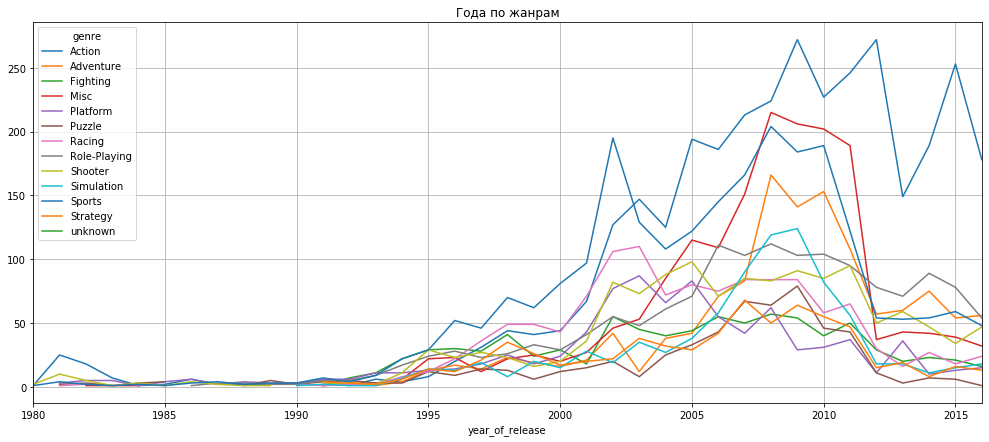

In [63]:
(
    df
    .query('year_of_release != 0')
    .pivot_table(index = 'year_of_release', columns = 'genre', values = 'name', aggfunc = 'count')
    .plot(figsize = (17, 7), grid = True, title = 'Года по жанрам')
)


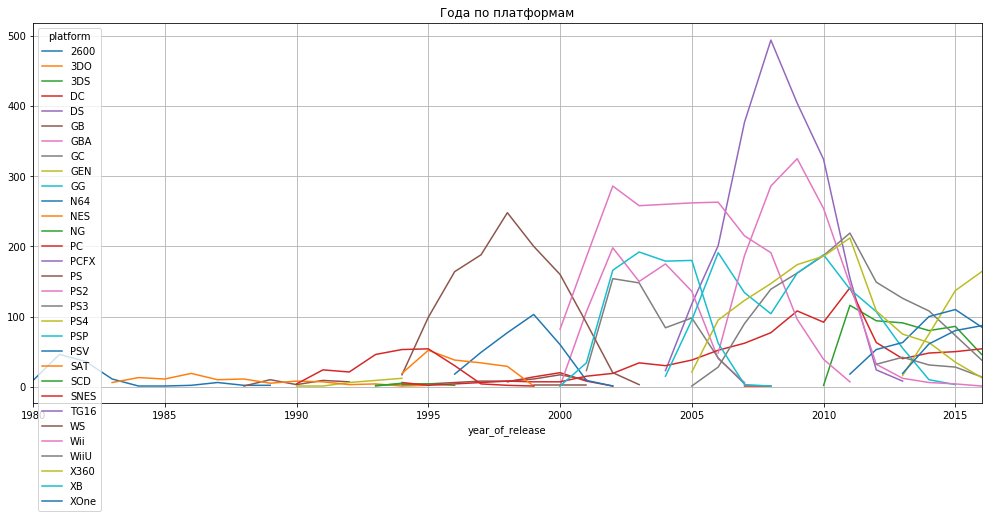

In [64]:
(
    df
    .query('year_of_release != 0')
    .pivot_table(index = 'year_of_release', columns = 'platform', values = 'name', aggfunc = 'count')
    .plot(figsize = (17, 7), grid = True, title = 'Года по платформам')
)


Сначала хотел заменить оставшиеся значения "0" на медиану по ненулевым значениям по жанрам (Года по жанрам). 
Но при просмотре второго графика (Года по платформам), сделал вывод, что некоторые платформы становятся неактуальны с течением времени, а жанры актуальны для разных платформ. Значит буду заменять на медиану по платфоме и по жанру.

In [65]:
year_0 = (
    df
    .query('year_of_release == 0')
    .pivot_table(index = ['name', 'platform','genre'], values = 'year_of_release', aggfunc = 'count')
)

In [66]:
year_0 = year_0.reset_index()

In [67]:
del year_0['year_of_release']

In [68]:
year_0

,name,platform,genre
0,Action Man-Operation Extreme,PS,Action
1,Advance Wars: Days of Ruin,DS,Strategy
2,Adventure,2600,Adventure
3,Agarest Senki: Re-appearance,PS3,Role-Playing
4,Air-Sea Battle,2600,Shooter
...,...,...,...
134,Yoostar on MTV,X360,Misc
135,Yu Yu Hakusho: Dark Tournament,PS2,Fighting
136,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,Racing
137,Zero: Tsukihami no Kamen,Wii,Action


In [69]:
year_1 = (
    df
    .query('year_of_release != 0')
    .pivot_table(index = ['platform','genre'], values = 'year_of_release', aggfunc = 'median')
)

In [70]:
year_1 = year_1.reset_index()

In [71]:
year_1

,platform,genre,year_of_release
0,2600,Action,1982.0
1,2600,Adventure,1983.0
2,2600,Fighting,1980.0
3,2600,Misc,1980.0
4,2600,Platform,1982.0
...,...,...,...
289,XOne,Role-Playing,2015.0
290,XOne,Shooter,2015.0
291,XOne,Simulation,2015.5
292,XOne,Sports,2015.0


In [72]:
year_0 = year_0.merge(year_1, on = ['platform', 'genre'], how = 'left')

Сделал две таблицы. Сортировка по жанрам и платформам для нулевых значений. А так же Значения медианы по платформам и жанрам для ненулевых значений. Соединил.

In [73]:
df = df.merge(year_0, on = ['name', 'platform', 'genre'], how = 'left')

In [74]:
df.loc[df['year_of_release_x'] == 0, 'year_of_release_x'] = df['year_of_release_y']

In [75]:
del df['year_of_release_y']

In [76]:
df['year_of_release_x'] = df['year_of_release_x'].astype('int')

Прибавил к общей, заменил нулевые значения, лишнее потер.

In [77]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', 'unknown'], dtype=object)

In [78]:
df['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
unknown            2
Name: genre, dtype: int64

Пропуски заменил ранее. Так как у этих двух игр(ранее пропуски) нет и наименований, не представляю возможным как-то найти инфомацию.

In [79]:
df['na_sales'].value_counts()

0.00    4508
0.02     576
0.03     561
0.04     549
0.01     545
        ... 
4.98       1
4.21       1
6.82       1
5.05       1
9.00       1
Name: na_sales, Length: 402, dtype: int64

In [80]:
df['na_sales'].describe()

count    16715.000000
mean         0.263377
std          0.813604
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

Значения 0 считаю нормальными. Так как это деньги. Так как это миллионы долларов, а числа были округлены до двух знаков после запятой, считаю это ошибкой округления. Предполагаю, что были малые значения в разрезе единиц измерения. Работаю с тем что есть. 0 так 0.

In [81]:
df['eu_sales'].value_counts()

0.00    5870
0.01    1494
0.02    1308
0.03     926
0.04     709
        ... 
3.59       1
4.02       1
2.24       1
2.27       1
3.75       1
Name: eu_sales, Length: 307, dtype: int64

In [82]:
df['eu_sales'].describe()

count    16715.000000
mean         0.145060
std          0.503339
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

Аналагочно  с предыдущим столбцом.

(Значения 0 считаю нормальными. Так как это деньги. Так как это миллионы долларов, а числа были округлены до двух знаков после запятой, считаю это ошибкой округления. Предполагаю, что были малые значения в разрезе единиц измерения. Работаю с тем что есть. 0 так 0.)

In [83]:
df['jp_sales'].value_counts()

0.00    10514
0.02      741
0.01      706
0.03      546
0.04      397
        ...  
1.16        1
2.12        1
7.20        1
2.17        1
6.50        1
Name: jp_sales, Length: 244, dtype: int64

In [84]:
df['jp_sales'].describe()

count    16715.000000
mean         0.077617
std          0.308853
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

Аналагочно  с предыдущим столбцом.

(Значения 0 считаю нормальными. Так как это деньги. Так как это миллионы долларов, а числа были округлены до двух знаков после запятой, считаю это ошибкой округления. Предполагаю, что были малые значения в разрезе единиц измерения. Работаю с тем что есть. 0 так 0.)

In [85]:
df['other_sales'].value_counts()

0.00    6601
0.01    3464
0.02    1618
0.03     926
0.04     654
        ... 
0.96       1
1.93       1
0.97       1
1.37       1
1.06       1
Name: other_sales, Length: 155, dtype: int64

In [86]:
df['other_sales'].describe()

count    16715.000000
mean         0.047342
std          0.186731
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

Аналагочно  с предыдущим столбцом.

(Значения 0 считаю нормальными. Так как это деньги. Так как это миллионы долларов, а числа были округлены до двух знаков после запятой, считаю это ошибкой округления. Предполагаю, что были малые значения в разрезе единиц измерения. Работаю с тем что есть. 0 так 0.)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name                 16715 non-null object
platform             16715 non-null object
year_of_release_x    16715 non-null int64
genre                16715 non-null object
na_sales             16715 non-null float64
eu_sales             16715 non-null float64
jp_sales             16715 non-null float64
other_sales          16715 non-null float64
critic_score         16715 non-null int64
user_score           16715 non-null float64
rating               9949 non-null object
dtypes: float64(5), int64(2), object(4)
memory usage: 2.2+ MB


In [88]:
df['critic_score'].value_counts()

-1     8578
 70     256
 71     254
 75     245
 78     240
       ... 
 20       3
 22       1
 17       1
 13       1
 21       1
Name: critic_score, Length: 83, dtype: int64

In [89]:
df['critic_score'].describe()

count    16715.000000
mean        33.060844
std         36.299555
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         70.000000
max         98.000000
Name: critic_score, dtype: float64

Ранее при преобразование типа, пришлось проставить целые значения. Для обозначение пропусков (Nan) выбрал "-1"

In [90]:
df['user_score'].value_counts()

-1.0    9125
 7.8     324
 8.0     290
 8.2     282
 8.3     254
        ... 
 1.1       2
 2.3       2
 1.5       2
 0.0       1
 9.7       1
Name: user_score, Length: 96, dtype: int64

In [91]:
df['user_score'].describe()

count    16715.000000
mean         2.689447
std          4.169833
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          7.300000
max          9.700000
Name: user_score, dtype: float64

Ранее при преобразование типа, пришлось проставить целые значения. Для обозначение пропусков (Nan) выбрал "-1". Для обозначение переменной для ожидания оценки (tbd) выбрал "0"

In [92]:
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

In [93]:
df['rating'].describe()

count     9949
unique       8
top          E
freq      3990
Name: rating, dtype: object

In [94]:
df['rating'] = df['rating'].fillna('unknown')

In [95]:
df['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Рейтинг пока заменять ничем не буду. Либо игра не отправлялась в организацию ESRB. Либо не заполнялся воообще. Так как не имеет серьезных рейтинговых ограничений. Детски е игры и тд.

<a name="Шаг_2.4"></a>

#### Суммарные продажи во всех регионах

In [96]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name                 16715 non-null object
platform             16715 non-null object
year_of_release_x    16715 non-null int64
genre                16715 non-null object
na_sales             16715 non-null float64
eu_sales             16715 non-null float64
jp_sales             16715 non-null float64
other_sales          16715 non-null float64
critic_score         16715 non-null int64
user_score           16715 non-null float64
rating               16715 non-null object
all_sales            16715 non-null float64
dtypes: float64(6), int64(2), object(4)
memory usage: 2.3+ MB


In [98]:
df.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating', 'all_sales']

In [99]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38


Максимально заполнил пустае значение. Стоит так же помнить о значениях "-1", что являются Nan и исключать их из отборов в дальнейшем. 

В столбцах с именем и жанром есть две неопределенные игры. Даты проставил по медане в разрезе жанров и платформ.
Нулевые значения в суммах продаж придется счить за 0. Рейтинг оставил без изменений.

[Home](#Оглавление)

<a name="Шаг_3"></a>

### Исследовательский анализ данных

<a name="Шаг_3.1"></a>

#### A. Cколько игр выпускалось в разные годы.

In [100]:
(
    df
    .pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
    .sort_values(by = 'name', ascending = False)
    .head()

)

,name
year_of_release,
2008,1468
2009,1450
2010,1288
2007,1204
2011,1159


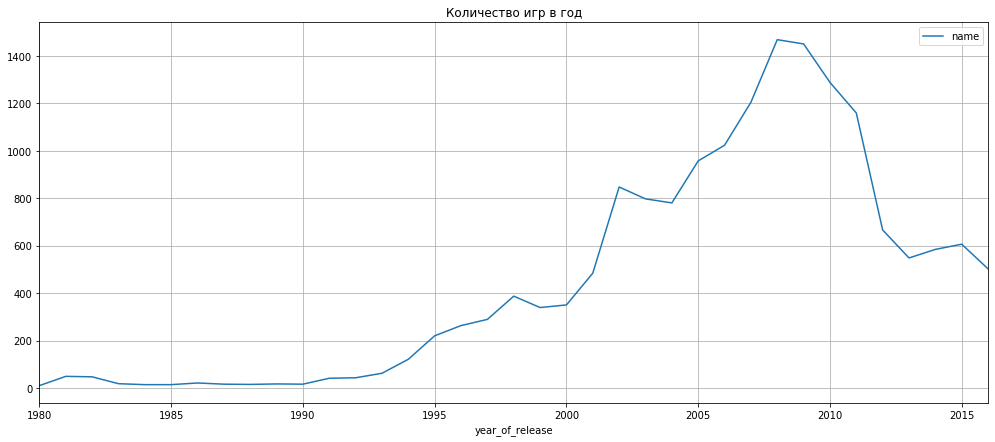

In [101]:
(
    df
    .pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
    .plot(figsize = (17, 7), grid = True, title = 'Количество игр в год')
)

Как видно из таблицы и графика (Количество игр в год). Пик количества выпущенных игр пришелся на 2008 год. Потом к 2016 году количество релизов опустилось почти до значений 2001 года.

Счтитаю, что жданные за все периоды не важны. Самыми актуальными считаю данные после 2011 года. То есть не учитывать данные с резким уменьшением количества релизов(почти в два раза).

In [102]:
(
    df
    .query('year_of_release > 2011')
    .pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')

)

,name
year_of_release,
2012,666
2013,548
2014,584
2015,606
2016,502


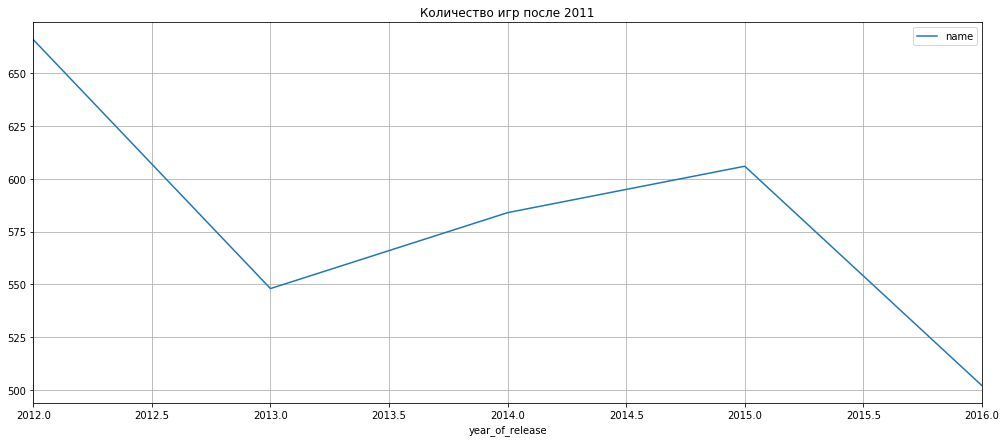

In [103]:
(
    df
    .query('year_of_release > 2011')
    .pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
    .plot(figsize = (17, 7), grid = True, title = 'Количество игр после 2011')
)

На графике "Количество игр после 2011" показано количество релизов после 2011 года. Нет резких скачков.

[Home](#Оглавление)

<a name="Шаг_3.2"></a>

#### B. Как менялись продажи по платформам.  

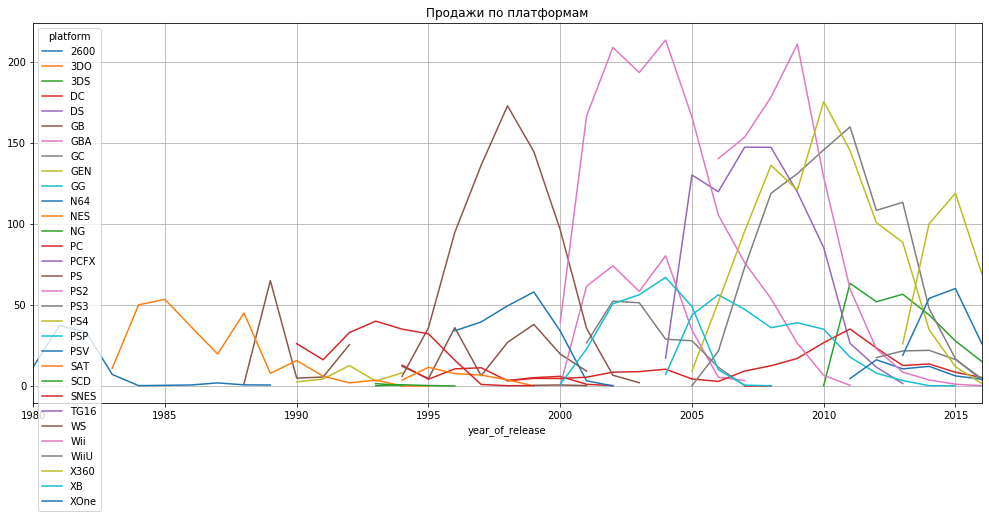

In [104]:
(
    df
    .pivot_table(index = 'year_of_release', columns = 'platform', values = 'all_sales', aggfunc = 'sum')
    .plot(figsize = (17, 7), grid = True, title = 'Продажи по платформам')
)

Как представлено на графике, в основном после пика продаж идет снижение. Без возврата к предшествующему пику. 

##### Платформы с наибольшими суммарными продажами и распределение по годам.

In [105]:
platform_all_sales = (
    df
    .pivot_table(index = 'platform', values = 'all_sales', aggfunc = 'sum')
    .sort_values(by = 'all_sales', ascending = False)

)

Отобрал и отсортировал

In [106]:
platform_all_sales = platform_all_sales.reset_index()

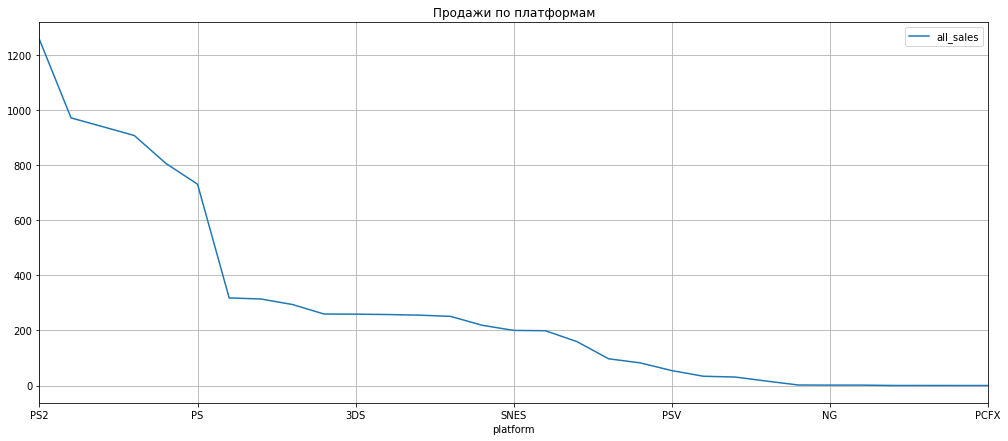

In [107]:
platform_all_sales.plot(x = 'platform', y = 'all_sales', figsize = (17, 7), grid = True, title = 'Продажи по платформам')

In [108]:
platform_all_sales.head()

,platform,all_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12


Из представленной выше таблицы виден отрыв следующих платформ (сумм продаж по платформам).

    0	PS2  1255.77
    1	X360 971.42
    2	PS3  939.65
    3	Wii  907.51
    4	DS   806.12
    5	PS   730.86

In [109]:
top_lst_platform = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

Перенес все наименования топ платформ в отдельную переменную.

In [110]:
top_sall_platform = (
    df
    .query('platform in @top_lst_platform')
    .pivot_table(index = 'year_of_release', columns = 'platform', values = 'all_sales', aggfunc = 'sum')
)

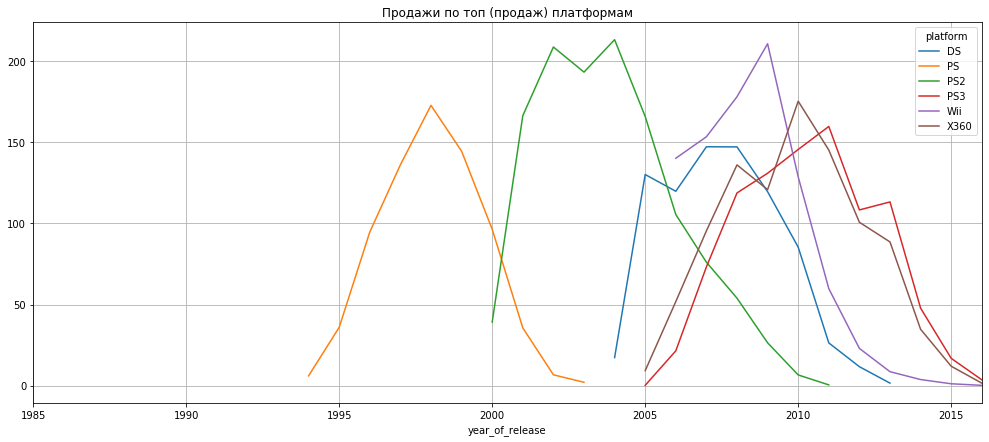

In [111]:
top_sall_platform.plot(figsize = (17, 7), grid = True, title = 'Продажи по топ (продаж) платформам')

Построил график, о подтверждает ранее выведеную теорию (после пика релизов по платформам, неминуемо идет спад, за редким исключением).

In [112]:
top_sall_platform = top_sall_platform.reset_index()

In [113]:
top_sall_platform.head()

platform,year_of_release,DS,PS,PS2,PS3,Wii,X360
0,1985,0.02,NaN,NaN,NaN,NaN,NaN
1,1994,NaN,6.03,NaN,NaN,NaN,NaN
2,1995,NaN,35.96,NaN,NaN,NaN,NaN
3,1996,NaN,94.70,NaN,NaN,NaN,NaN
4,1997,NaN,136.17,NaN,NaN,NaN,NaN


##### За какой характерный срок появляются новые и исчезают старые платформы

In [114]:
top_sall_platform_count = top_sall_platform.count()

Из ранее сформированной таблицы беру существующие значения. Считаю количество.

In [115]:
top_sall_platform_count = top_sall_platform_count.reset_index()

In [116]:
top_sall_platform_count = top_sall_platform_count.drop([0])

In [117]:
top_sall_platform_count.columns = ['platform', 'count_year']

In [118]:
top_sall_platform_count['count_year'].median()

11.5

In [119]:
top_sall_platform_count['count_year'].mean()

11.333333333333334

ПСреднее количество лет равно 11,33. Медиана равна 11,5. 

Получается что рождение, восход, пик, закат и смерть платформы происходят в течение 11 - 11,5 лет.

Так же стоит учитывать пиратские копии и BitTorrent (протокол).

[Home](#Оглавление)

<a name="Шаг_3.3"></a>

#### C. Актуальный период для прогноза на 2017 год.

In [120]:
actual_years = (
    df
    .query('year_of_release > 2011')
)

In [121]:
actual_years

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01


Считаю актуальным период с 2012 (включительно) года. Пики по всем платформам прошли.

[Home](#Оглавление)

<a name="Шаг_3.4"></a>

#### D. Срез данных за актуальный период

In [122]:
actual_years.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


Данные за предыдущие годы удалять не стал. создал новую переменную.

[Home](#Оглавление)

<a name="Шаг_3.5"></a>

#### E. Какие платформы лидируют по продажам, несколько потенциально прибыльных платформ.

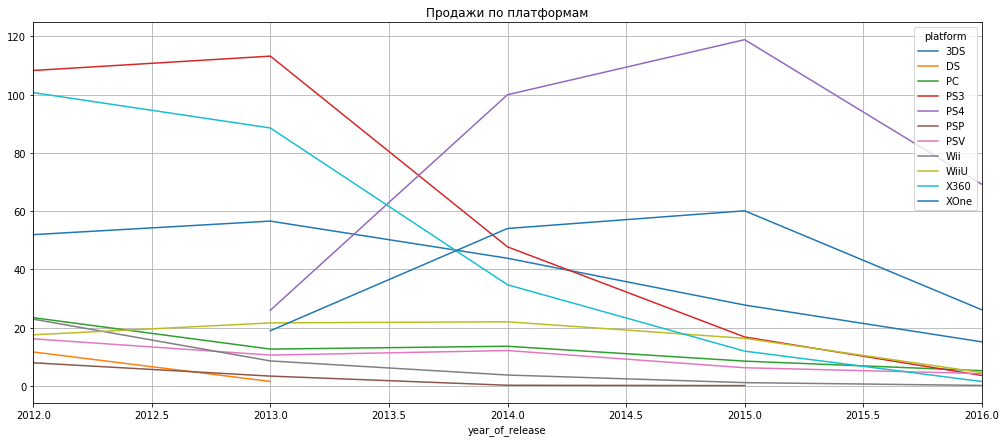

In [123]:
(
    actual_years
    .pivot_table(index = 'year_of_release', columns = 'platform', values = 'all_sales', aggfunc = 'sum')
    .plot(figsize = (17, 7), grid = True, title = 'Продажи по платформам')
)

На графике видно, что после выхода в 2013 года двух платформ XOne(Xbox) и PS4(PlayStation 4) продажи по другим платформам пошли на спад. Так же следует отметить платформу 3DS (Nintendo 3DS). Ее спад не столь категоричен.
Итого считаю потенциально прибыльными следующие платформы:

    XOne(Xbox) 
    PS4(PlayStation 4) 
    3DS (Nintendo 3DS)

[Home](#Оглавление)

<a name="Шаг_3.6"></a>

#### F. График «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. 

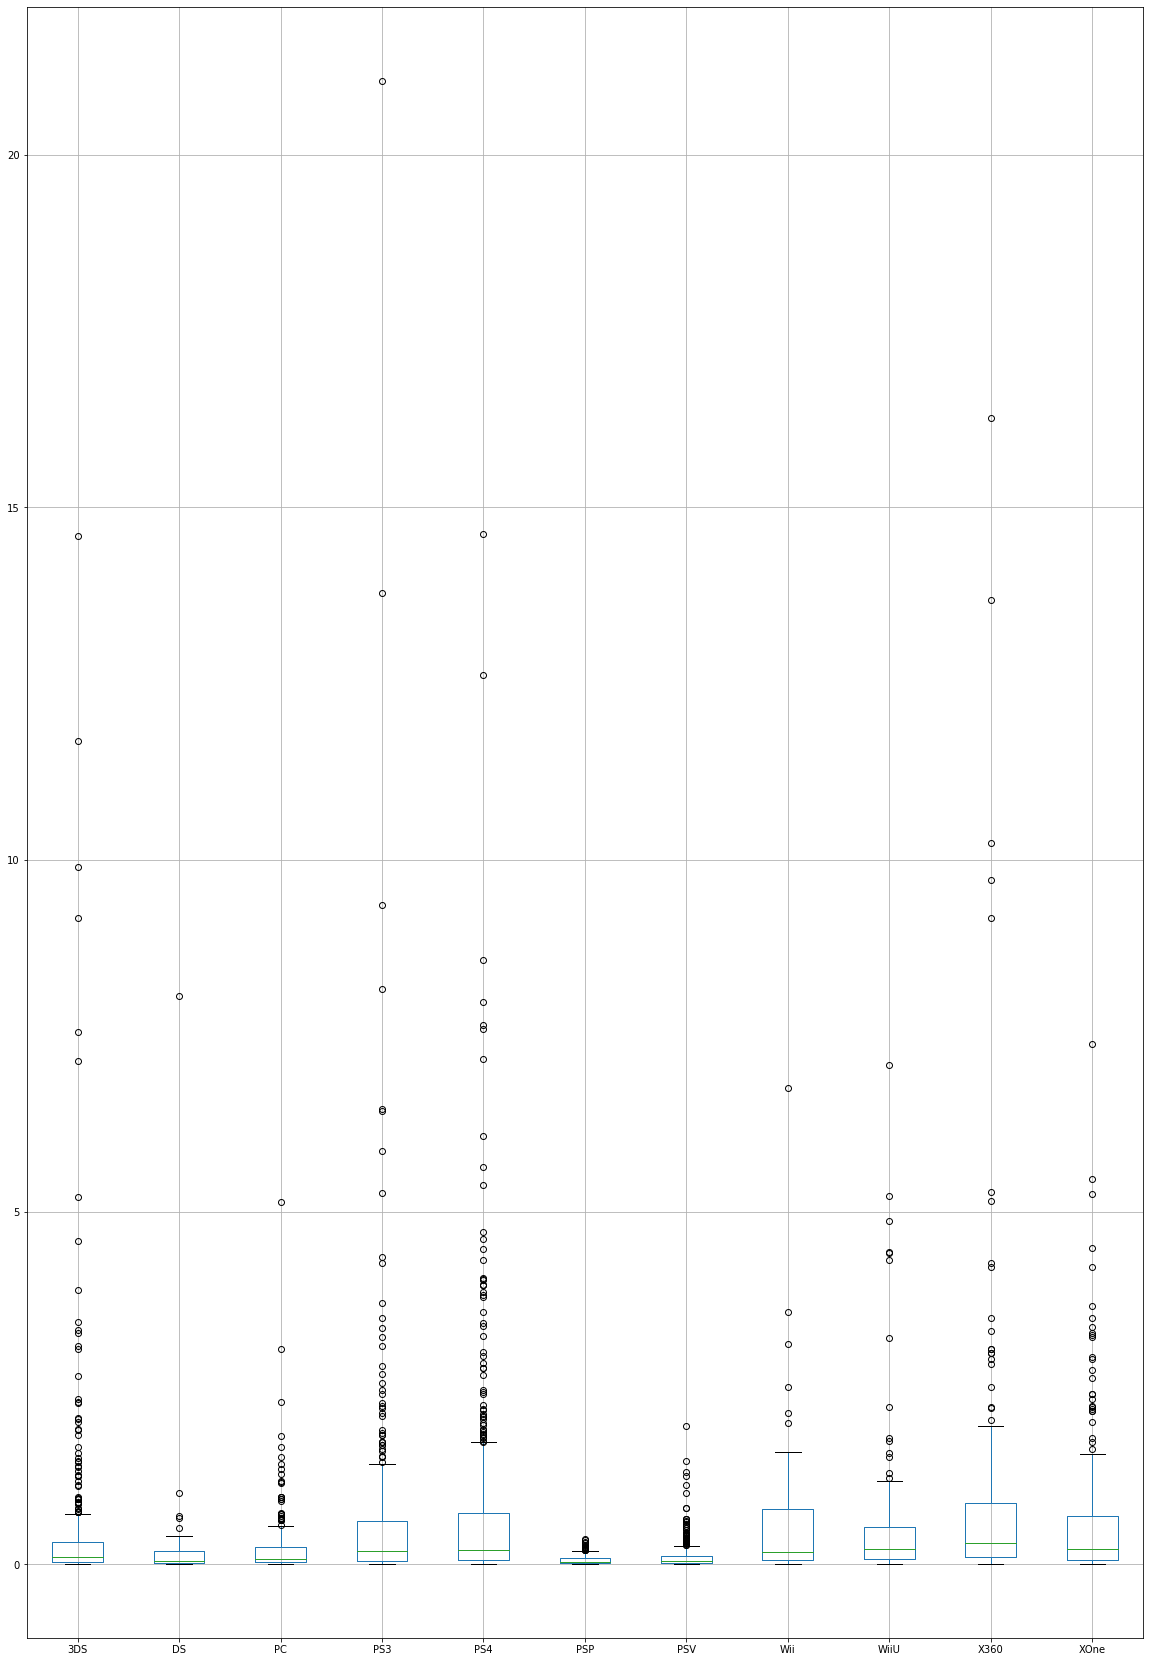

In [124]:
(
    actual_years
    .pivot_table(index = 'name', columns = 'platform', values = 'all_sales', aggfunc = 'sum')
    .boxplot(figsize = (20, 30))
)

boxplot()

In [125]:
(
    actual_years

    .pivot_table(index = 'name', columns = 'platform', values = 'all_sales', aggfunc = 'sum')
    .describe()
)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,400.000000,32.000000,255.000000,496.000000,392.000000,175.000000,412.000000,55.000000,147.000000,294.000000,247.000000
mean,0.488300,0.412813,0.249059,0.584173,0.801378,0.066800,0.120000,0.665455,0.559116,0.807891,0.645020
std,1.380617,1.416559,0.490149,1.458971,1.609456,0.073594,0.202882,1.157206,1.058836,1.706880,1.036139
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.040000,0.020000,0.030000,0.050000,0.060000,0.020000,0.020000,0.065000,0.080000,0.100000,0.060000
50%,0.110000,0.050000,0.080000,0.195000,0.200000,0.040000,0.050000,0.180000,0.220000,0.310000,0.220000
75%,0.312500,0.195000,0.240000,0.610000,0.730000,0.090000,0.120000,0.790000,0.525000,0.870000,0.685000
max,14.600000,8.060000,5.140000,21.050000,14.630000,0.360000,1.960000,6.760000,7.090000,16.270000,7.390000


вывел describe()

Вывод.

Брал в расчет игры с датой выпуска после 2011 года.
Отмечаю разное количество продаж. максимально доходит да 496 у PS3. Минимально у DS 32.
Средний показатель максимально доходит да 0,807 у X360. Минимально у PSP 0,0668.
Стандартное отклонение максимально доходит да 1,7068 млн у X360. Минимально у PSP 0,0736.
Медиана максимально доходит да 0,31 млн у X360. Минимально у PSP 0,4.

Много выбросов. Указывает на топовые игры. Тут есть на всех платформах.
Разница в продажах очевидна.
Бесспорный лидер X360.
При просмотре стандартного отклонения можно выделить две группы. Std меньше 1 млн и больше.

    Группа где std больше 1 млн
    3DS	
    DS 
    PS3 
    PS4 
    Wii 
    WiiU 
    X360 
    XOne
    
    Группа где std меньше 1 млн
    PC
    PSP
    PSV
    

[Home](#Оглавление)

<a name="Шаг_3.7"></a>

#### G.Влияние на продажи внутри одной популярной платформы, отзывы пользователей и критиков. 

In [126]:
actual_years

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01


Самой популярной платфомой считаю (вывод выше + график + таблица) X360.

In [127]:
actual_years_x360_critic = (
    actual_years
    .query('critic_score != -1 and platform == "X360"')
)

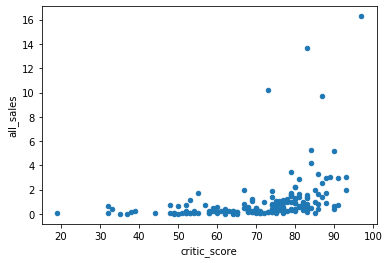

In [129]:
actual_years_x360_critic.plot(x='critic_score', y='all_sales', kind='scatter')

In [130]:
actual_years_x360_user = (
    actual_years
    .query('user_score != -1 and user_score != 0 and platform == "X360"')
)

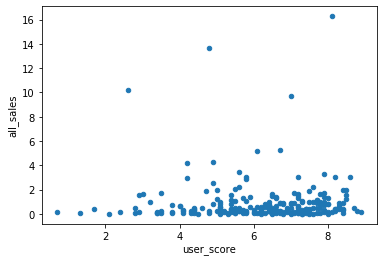

In [131]:
actual_years_x360_user.plot(x='user_score', y='all_sales', kind='scatter')

In [132]:
actual_years_x360_critic['critic_score'].corr(actual_years_x360_critic['all_sales'])

0.3602659026138049

Сила связи слабая

In [133]:
actual_years_x360_user['user_score'].corr(actual_years_x360_user['all_sales'])

0.006314938203566999

Сила связи очень слабая

На примере популярной платформы X360 мы видим что отзывы критиков оказывают небольшое влияние. В то время, как отзывы пользователей не оказывают никакого влияния.

Проверим на других платформах


У критиков еще есть шанс повлиять на продажи игр, у пользователей нет.
    
Критики оценивают по определенным критериям все игры.

Пользователи оценивают игры по своему вкусу. Двух одинаковых мнений нет.


#### PS4

In [134]:
actual_years_ps4_critic = (
    actual_years
    .query('critic_score != -1 and platform == "PS4"')
)

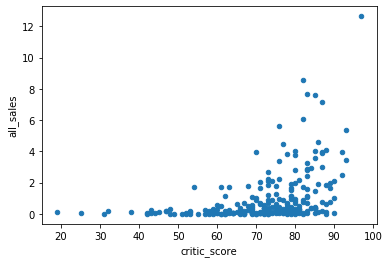

In [135]:
actual_years_ps4_critic.plot(x='critic_score', y='all_sales', kind='scatter')

In [136]:
actual_years_ps4_user = (
    actual_years
    .query('user_score != -1 and user_score != 0 and platform == "PS4"')
)

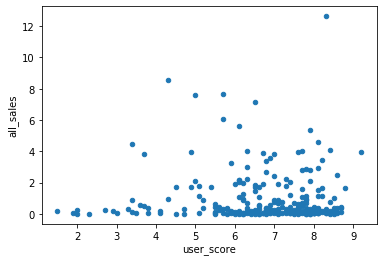

In [137]:
actual_years_ps4_user.plot(x='user_score', y='all_sales', kind='scatter')

In [138]:
actual_years_ps4_critic['critic_score'].corr(actual_years_ps4_critic['all_sales'])

0.40656790206178095

Сила связи слабая

In [139]:
actual_years_ps4_user['user_score'].corr(actual_years_ps4_user['all_sales'])

-0.031957110204556424

Сила связи очень слабая

Пример платформы подтверждает предыдущий вывод.

#### Wii

In [140]:
actual_years_wii_critic = (
    actual_years
    .query('critic_score != -1 and platform == "Wii"')
)

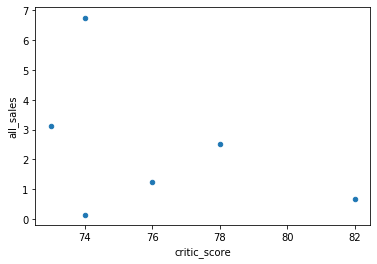

In [141]:
actual_years_wii_critic.plot(x='critic_score', y='all_sales', kind='scatter')

In [142]:
actual_years_wii_user = (
    actual_years
    .query('user_score != -1 and user_score != 0 and platform == "Wii"')
)

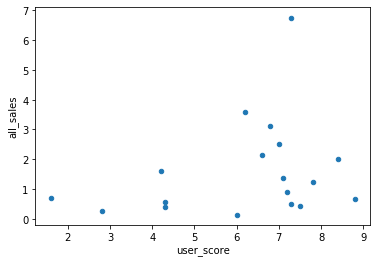

In [143]:
actual_years_wii_user.plot(x='user_score', y='all_sales', kind='scatter')

In [144]:
actual_years_wii_critic['critic_score'].corr(actual_years_wii_critic['all_sales'])

-0.4059967406465306

Сила связи слабая

In [145]:
actual_years_wii_user['user_score'].corr(actual_years_wii_user['all_sales'])

0.2775423925955098

Сила связи очень слабая

На платформе так же видим значимость замечаний критиков, но значение мнения пользователей возросло.

#### 3DS

In [146]:
actual_years_3ds_critic = (
    actual_years
    .query('critic_score != -1 and platform == "3DS"')
)

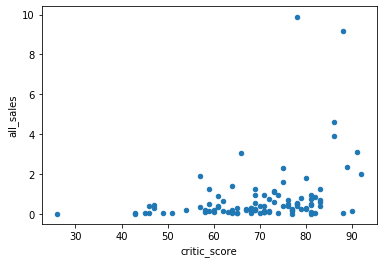

In [147]:
actual_years_3ds_critic.plot(x='critic_score', y='all_sales', kind='scatter')

In [148]:
actual_years_3ds_user = (
    actual_years
    .query('user_score != -1 and user_score != 0 and platform == "3DS"')
)

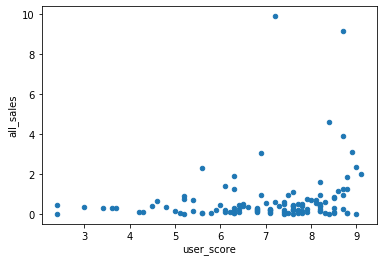

In [149]:
actual_years_3ds_user.plot(x='user_score', y='all_sales', kind='scatter')

In [150]:
actual_years_3ds_critic['critic_score'].corr(actual_years_3ds_critic['all_sales'])

0.32045778764077804

Сила связи слабая

In [151]:
actual_years_3ds_critic['user_score'].corr(actual_years_3ds_critic['all_sales'])

0.2030394216516574

Сила связи очень слабая

Примеры других платформ подтверждает предыдущий вывод. В итоге связь с оценками критиков слабая, с оценками пользователей очень слабая.



Рассматривался промежуток по играм с датой выхода после 2011 года.

[Home](#Оглавление)

<a name="Шаг_3.8"></a>

In [225]:
actual_years

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01


In [256]:
lst_platform_big = ['3DS', 'DS', 'PS3', 'PS4', 'Wii', 'WiiU', 'X360', 'XOne']

In [257]:
lst_platform_small = ['PC', 'PSP', 'PSV']

In [ ]:
'df[df['column'] == 'X']
['column']'

'3DS'

'График'

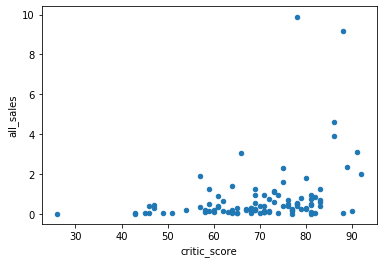

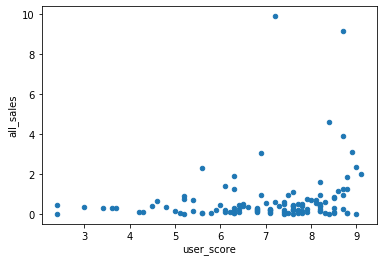

'Зависимость'

0.32045778764077804

'Зависимость от оценки критиков слабая'

0.2022435164213683

'Зависимость от оценки пользователей очень слабая'

'DS'

'График'

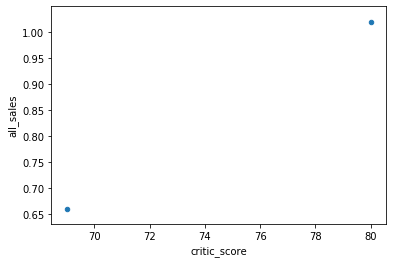

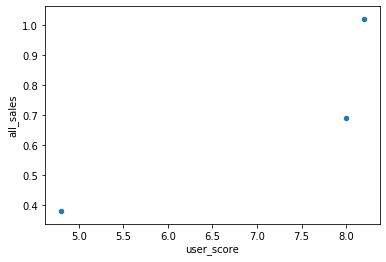

'Зависимость'

1.0

'Ошибка'

0.88270872757644

'Зависимость от оценки пользователей высокая'

'PS3'

'График'

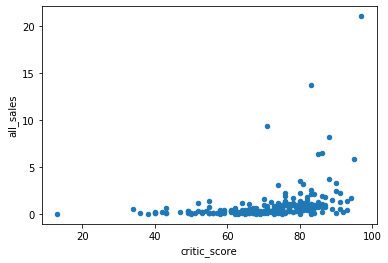

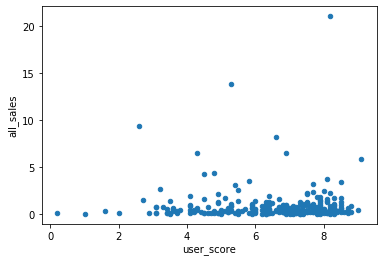

'Зависимость'

0.3313706318754621

'Зависимость от оценки критиков слабая'

0.005043048088258084

'Зависимость от оценки пользователей очень слабая'

'PS4'

'График'

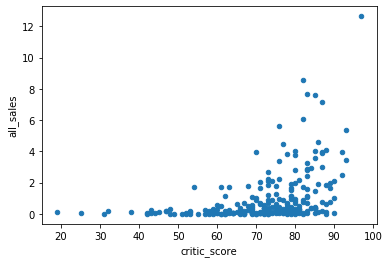

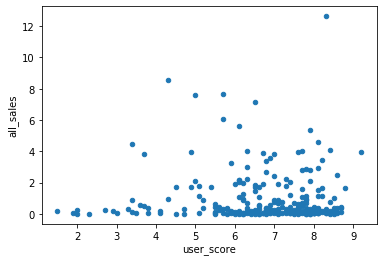

'Зависимость'

0.40656790206178095

'Зависимость от оценки критиков слабая'

0.031957110204556424

'Зависимость от оценки пользователей очень слабая'

'Wii'

'График'

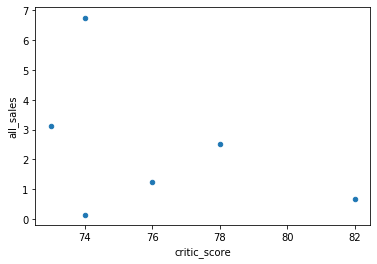

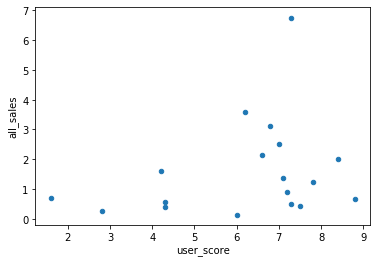

'Зависимость'

0.4059967406465306

'Зависимость от оценки критиков слабая'

0.2775423925955098

'Зависимость от оценки пользователей очень слабая'

'WiiU'

'График'

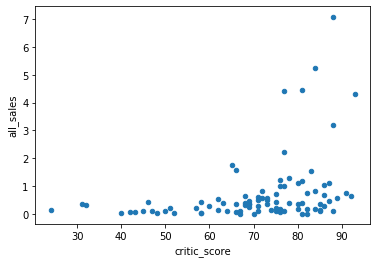

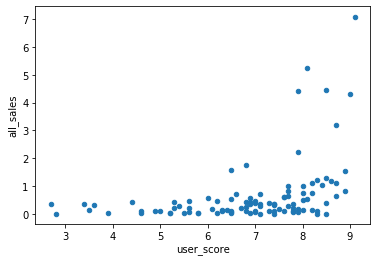

'Зависимость'

0.34837976012017485

'Зависимость от оценки критиков слабая'

0.4002190202148617

'Зависимость от оценки пользователей слабая'

'X360'

'График'

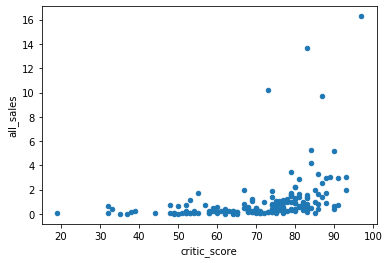

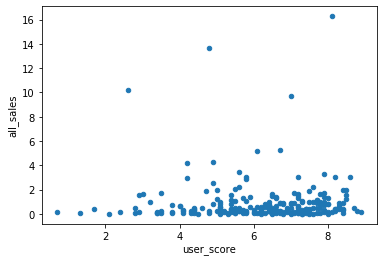

'Зависимость'

0.3602659026138049

'Зависимость от оценки критиков слабая'

0.006314938203566999

'Зависимость от оценки пользователей очень слабая'

'XOne'

'График'

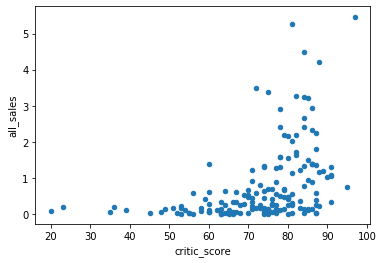

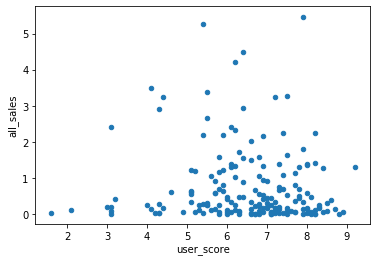

'Зависимость'

0.4169983280084017

'Зависимость от оценки критиков слабая'

0.06892505328279414

'Зависимость от оценки пользователей очень слабая'

In [271]:
for platform in lst_platform_big:
    
    data_critic = actual_years[actual_years['platform'] == platform]
    data_critic = data_critic[data_critic['critic_score'] != -1]
    data_user = actual_years[actual_years['platform'] == platform]
    data_user = data_user[data_user['user_score'] != -1]
    
    display(platform)
    display('График')
    data_critic.plot(x='critic_score', y='all_sales', kind='scatter')
    plt.show()
    data_user.plot(x='user_score', y='all_sales', kind='scatter')
    plt.show()
    display('Зависимость')
    crit_corr = data_critic['critic_score'].corr(data_critic['all_sales'])
    if crit_corr < 0:
        crit_corr = - crit_corr
    display(crit_corr)
    if 0 < crit_corr < 0.3:
        display('Зависимость от оценки критиков очень слабая')
    elif 0.3 <= crit_corr < 0.5:
        display('Зависимость от оценки критиков слабая')
    elif 0.5 <= crit_corr < 0.7:
        display('Зависимость от оценки критиков средняя')
    elif 0.7 <= crit_corr < 0.9:
        display('Зависимость от оценки критиков высокая')
    elif 0.9 <= crit_corr < 1:
        display('Зависимость от оценки критиков очень высокая')
    elif crit_corr == 0:
        display('Зависимости нет')
    else:
        display('Ошибка')
        
    user_corr = data_user['user_score'].corr(data_user['all_sales'])
    if user_corr < 0:
        user_corr = - user_corr
    display(user_corr)
    if 0 < user_corr < 0.3:
        display('Зависимость от оценки пользователей очень слабая')
    elif 0.3 <= user_corr < 0.5:
        display('Зависимость от оценки пользователей слабая')
    elif 0.5 <= user_corr < 0.7:
        display('Зависимость от оценки пользователей средняя')
    elif 0.7 <= user_corr < 0.9:
        display('Зависимость от оценки пользователей высокая')
    elif 0.9 <= user_corr < 1:
        display('Зависимость от оценки пользователей очень высокая')
    elif user_corr == 0:
        display('Зависимости нет')
    else:
        display('Ошибка. Мало данных')    

'PC'

'График'

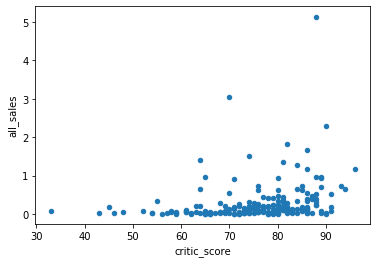

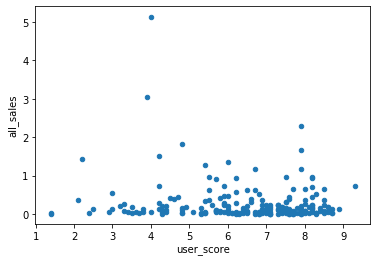

'Зависимость'

0.24057023259681187

'Зависимость от оценки критиков очень слабая'

0.12033868316119607

'Зависимость от оценки пользователей очень слабая'

'PSP'

'График'

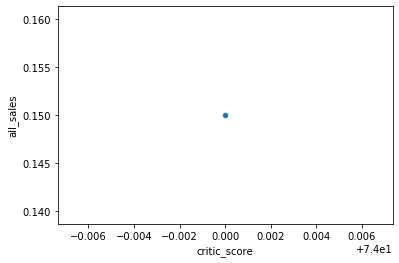

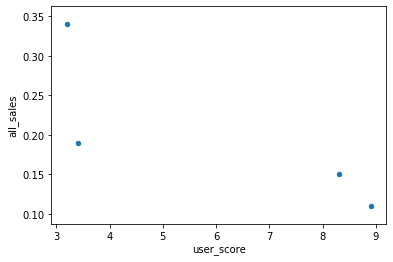

'Зависимость'

nan

'Ошибка. Мало данных'

0.802302061939321

'Зависимость от оценки пользователей высокая'

'PSV'

'График'

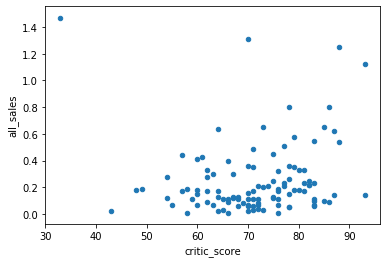

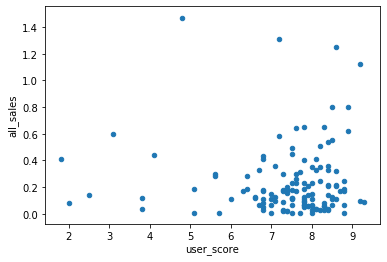

'Зависимость'

0.09446607248243677

'Зависимость от оценки критиков очень слабая'

0.004229953914709044

'Зависимость от оценки пользователей очень слабая'

In [274]:
for platform in lst_platform_small:
    
    data_critic = actual_years[actual_years['platform'] == platform]
    data_critic = data_critic[data_critic['critic_score'] != -1]
    data_user = actual_years[actual_years['platform'] == platform]
    data_user = data_user[data_user['user_score'] != -1]
    
    display(platform)
    display('График')
    data_critic.plot(x='critic_score', y='all_sales', kind='scatter')
    plt.show()
    data_user.plot(x='user_score', y='all_sales', kind='scatter')
    plt.show()
    display('Зависимость')
    crit_corr = data_critic['critic_score'].corr(data_critic['all_sales'])
    if crit_corr < 0:
        crit_corr = - crit_corr
    display(crit_corr)
    if 0 < crit_corr < 0.3:
        display('Зависимость от оценки критиков очень слабая')
    elif 0.3 <= crit_corr < 0.5:
        display('Зависимость от оценки критиков слабая')
    elif 0.5 <= crit_corr < 0.7:
        display('Зависимость от оценки критиков средняя')
    elif 0.7 <= crit_corr < 0.9:
        display('Зависимость от оценки критиков высокая')
    elif 0.9 <= crit_corr < 1:
        display('Зависимость от оценки критиков очень высокая')
    elif crit_corr == 0:
        display('Зависимости нет')
    else:
        display('Ошибка. Мало данных')
        
    user_corr = data_user['user_score'].corr(data_user['all_sales'])
    if user_corr < 0:
        user_corr = - user_corr
    display(user_corr)
    if 0 < user_corr < 0.3:
        display('Зависимость от оценки пользователей очень слабая')
    elif 0.3 <= user_corr < 0.5:
        display('Зависимость от оценки пользователей слабая')
    elif 0.5 <= user_corr < 0.7:
        display('Зависимость от оценки пользователей средняя')
    elif 0.7 <= user_corr < 0.9:
        display('Зависимость от оценки пользователей высокая')
    elif 0.9 <= user_corr < 1:
        display('Зависимость от оценки пользователей очень высокая')
    elif user_corr == 0:
        display('Зависимости нет')
    else:
        display('Ошибка. Мало данных')  

#### H. Выводы с продажами игр на других платформах.

#### PC

In [275]:
actual_years_pc_critic = (
    actual_years
    .query('critic_score != -1 and platform == "PC"')
)

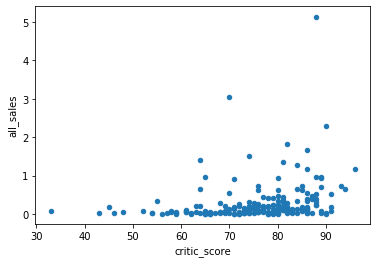

In [276]:
actual_years_pc_critic.plot(x='critic_score', y='all_sales', kind='scatter')

In [277]:
actual_years_pc_user = (
    actual_years
    .query('user_score != -1 and user_score != 0 and platform == "PC"')
)

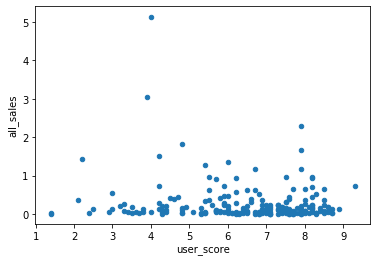

In [278]:
actual_years_pc_user.plot(x='user_score', y='all_sales', kind='scatter')

In [279]:
actual_years_pc_critic['critic_score'].corr(actual_years_pc_critic['all_sales'])

0.24057023259681187

Сила связи слабая

In [280]:
actual_years_pc_user['user_score'].corr(actual_years_pc_user['all_sales'])

-0.12033868316119607

Сила связи очень слабая

Следует отметить, что для списка с меньшим количеством продаж, связь между оценкой критиков и продажами тоже уменьшилась.
Следовательно можно предположить, что если бы оценки критиков были выше, то количество продаж увеличилось.

[Home](#Оглавление)

<a name="Шаг_3.9"></a>

#### I. Общее распределение игр по жанрам. 

In [282]:
actual_years.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


In [283]:
games_genre = (
    actual_years
    .pivot_table(index = 'genre', values = 'all_sales', aggfunc = ['count', 'sum'])
)

In [284]:
games_genre = games_genre.reset_index()

In [285]:
games_genre.columns = ['genre', 'count', 'sum']

In [286]:
games_genre = games_genre.sort_values(by = 'sum', ascending = False)

In [287]:
games_genre

,genre,count,sum
0,Action,1041,446.41
8,Shooter,237,304.75
7,Role-Playing,373,193.10
10,Sports,268,181.07
3,Misc,193,85.28
4,Platform,85,61.00
6,Racing,115,53.50
2,Fighting,109,44.49
9,Simulation,81,35.31
1,Adventure,305,29.55


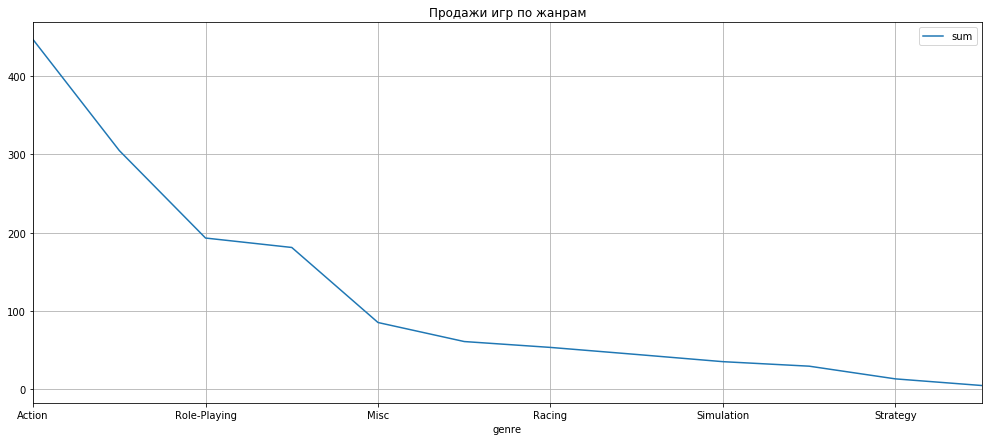

In [288]:
games_genre.plot(x = 'genre', y = 'sum', figsize = (17, 7), grid = True, title = 'Продажи игр по жанрам')

Исходя из таблицы и графика жанры делятся на две группы: 

    Больше 100 млн
    1 Action 
    2 Shooter 
    3 Role-Playing 
    4 Sports 
    
    
    Меньше 100 млн
    1 Misc
    2 Platform
    3 Racing
    4 Fighting
    5 Simulation
    6 Adventure
    7 Strategy
    8 Puzzle

Между жанром Sports и жанром Misc разница в 95.79 млн. Довольно сильный скачек между популярными и не популярными жанрами

In [289]:
top_genre = ['Action', 'Shooter', 'Role-Playing', 'Sports']

In [290]:
other_genre = ['Misc', 'Platform', 'Racing', 'Fighting', 'Simulation', 'Adventure', 'Strategy', 'Puzzle']

In [291]:
(
    actual_years
    .query('genre == @top_genre')
    .pivot_table(index = 'genre', columns = 'platform', values = 'all_sales', aggfunc = 'count')
)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
genre,,,,,,,,,,,
Action,157.0,16.0,70.0,171.0,144.0,64.0,145.0,22.0,64.0,103.0,85.0
Role-Playing,80.0,2.0,27.0,62.0,51.0,29.0,85.0,2.0,7.0,14.0,14.0
Shooter,2.0,NaN,42.0,50.0,41.0,NaN,4.0,NaN,10.0,50.0,38.0
Sports,12.0,2.0,17.0,63.0,46.0,10.0,21.0,7.0,8.0,44.0,38.0


In [292]:
(
    actual_years
    .query('genre == @other_genre')
    .pivot_table(index = 'genre', columns = 'platform', values = 'all_sales', aggfunc = 'count')
)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
genre,,,,,,,,,,,
Adventure,34.0,3.0,17.0,44.0,28.0,52.0,92.0,2.0,3.0,16.0,14.0
Fighting,9.0,NaN,3.0,33.0,18.0,4.0,14.0,NaN,5.0,16.0,7.0
Misc,41.0,2.0,5.0,22.0,20.0,11.0,22.0,15.0,22.0,14.0,19.0
Platform,19.0,2.0,3.0,11.0,12.0,NaN,8.0,2.0,17.0,6.0,5.0
Puzzle,13.0,4.0,2.0,1.0,1.0,NaN,2.0,1.0,4.0,NaN,NaN
Racing,1.0,NaN,20.0,21.0,19.0,NaN,9.0,1.0,3.0,21.0,20.0
Simulation,21.0,1.0,23.0,11.0,6.0,1.0,3.0,2.0,1.0,8.0,4.0
Strategy,11.0,NaN,26.0,8.0,6.0,4.0,7.0,1.0,3.0,2.0,3.0


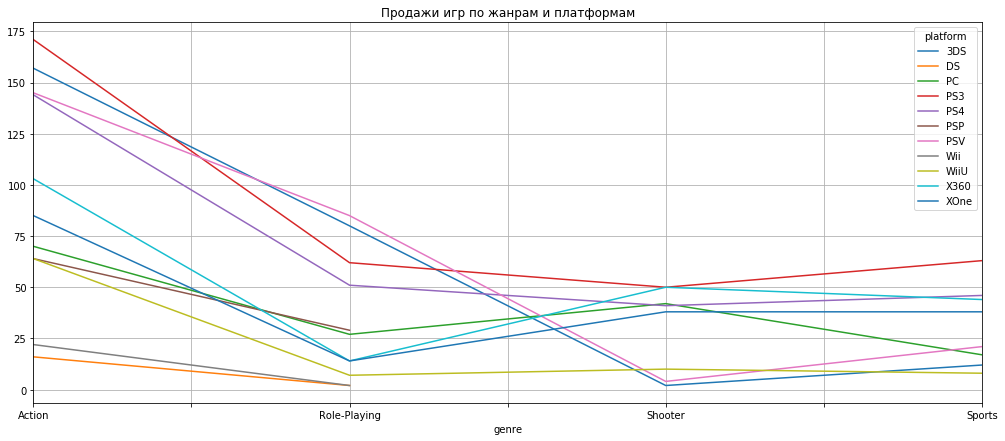

In [293]:
(
    actual_years
    .query('genre == @top_genre')
    .pivot_table(index = 'genre', columns = 'platform', values = 'all_sales', aggfunc = 'count')
    .plot(figsize = (17, 7), grid = True, title = 'Продажи игр по жанрам и платформам')
)

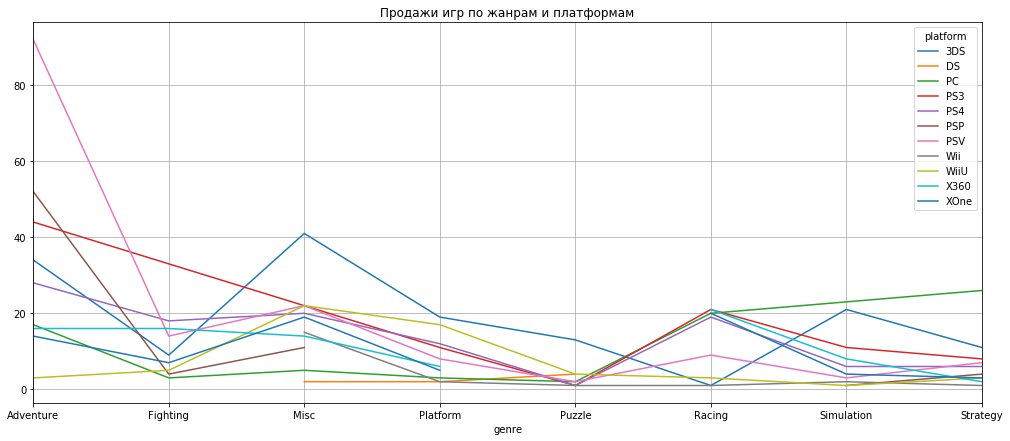

In [294]:
(
    actual_years
    .query('genre == @other_genre')
    .pivot_table(index = 'genre', columns = 'platform', values = 'all_sales', aggfunc = 'count')
    .plot(figsize = (17, 7), grid = True, title = 'Продажи игр по жанрам и платформам')
)

Исходя из таблицы и графиков (Продажи игр по жанрам и платформам) следует отметить, что у каждой платформы свои популярные жанры.

Данные за период после 2011 года.

[Home](#Оглавление)

<a name="Шаг_4"></a>

### Портрет пользователя каждого региона

<a name="Шаг_4.1"></a>

#### Самые популярные платформы (топ-5)

In [296]:
actual_years.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


In [297]:
all_sales = (
    actual_years
    .pivot_table(index = 'platform', values = 'all_sales', aggfunc = 'sum')
    .sort_values(by = 'all_sales', ascending = False)
)

In [298]:
all_sales = all_sales.reset_index()

In [299]:
all_sales

,platform,all_sales
0,PS4,314.14
1,PS3,289.75
2,X360,237.52
3,3DS,195.32
4,XOne,159.32
5,WiiU,82.19
6,PC,63.51
7,PSV,49.44
8,Wii,36.60
9,DS,13.21


Топ платформ по всем регионам

In [300]:
na_sales = (
    actual_years
    .pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')
    .sort_values(by = 'na_sales', ascending = False)
)

In [301]:
na_sales = na_sales.reset_index()

In [302]:
na_sales

,platform,na_sales
0,X360,140.57
1,PS4,108.74
2,PS3,103.75
3,XOne,93.12
4,3DS,55.75
5,WiiU,38.10
6,PC,19.26
7,Wii,18.14
8,PSV,11.09
9,DS,4.93


Топ платформ по продажам в Северной Америке

In [303]:
eu_sales = (
    actual_years
    .pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')
    .sort_values(by = 'eu_sales', ascending = False)
)

In [304]:
eu_sales = eu_sales.reset_index()

In [305]:
eu_sales

,platform,eu_sales
0,PS4,141.09
1,PS3,107.27
2,X360,74.89
3,XOne,51.59
4,3DS,42.83
5,PC,38.38
6,WiiU,25.13
7,Wii,12.34
8,PSV,11.41
9,DS,3.78


Топ платформ по продажам в Европе

In [306]:
jp_sales = (
    actual_years
    .pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')
    .sort_values(by = 'jp_sales', ascending = False)
)

In [307]:
jp_sales = jp_sales.reset_index()

In [308]:
jp_sales

,platform,jp_sales
0,3DS,87.82
1,PS3,35.32
2,PSV,21.11
3,PS4,15.96
4,WiiU,13.01
5,PSP,10.71
6,DS,3.72
7,Wii,3.39
8,X360,1.57
9,XOne,0.34


Топ платформ по продажам в Японии

Итого

Топ 5 платформ в Северной Америке

    1 X360
    2 PS4
    3 PS3
    4 XOne
    5 3DS
    
Топ 5 платформ в Европе 

    1 PS4
    2 PS3
    3 X360	
    4 XOne	
    5 3DS
    
Топ 5 платформ в Японии

    1 3DS	
    2 PS3	
    3 PSV	
    4 PS4	
    5 WiiU

In [309]:
all_sales = all_sales.merge(na_sales, on = 'platform', how = 'left')

In [310]:
all_sales = all_sales.merge(eu_sales, on = 'platform', how = 'left')

In [311]:
all_sales = all_sales.merge(jp_sales, on = 'platform', how = 'left')

In [312]:
all_sales

,platform,all_sales,na_sales,eu_sales,jp_sales
0,PS4,314.14,108.74,141.09,15.96
1,PS3,289.75,103.75,107.27,35.32
2,X360,237.52,140.57,74.89,1.57
3,3DS,195.32,55.75,42.83,87.82
4,XOne,159.32,93.12,51.59,0.34
5,WiiU,82.19,38.10,25.13,13.01
6,PC,63.51,19.26,38.38,0.00
7,PSV,49.44,11.09,11.41,21.11
8,Wii,36.60,18.14,12.34,3.39
9,DS,13.21,4.93,3.78,3.72


In [313]:
all_sales['%_na'] = all_sales['na_sales'] / all_sales['all_sales'] * 100

In [314]:
all_sales['%_eu'] = all_sales['eu_sales'] / all_sales['all_sales'] * 100

In [315]:
all_sales['%_jp'] = all_sales['jp_sales'] / all_sales['all_sales'] * 100

In [316]:
all_sales

,platform,all_sales,na_sales,eu_sales,jp_sales,%_na,%_eu,%_jp
0,PS4,314.14,108.74,141.09,15.96,34.615140,44.913096,5.080537
1,PS3,289.75,103.75,107.27,35.32,35.806730,37.021570,12.189819
2,X360,237.52,140.57,74.89,1.57,59.182385,31.529976,0.660997
3,3DS,195.32,55.75,42.83,87.82,28.542904,21.928118,44.962113
4,XOne,159.32,93.12,51.59,0.34,58.448406,32.381371,0.213407
5,WiiU,82.19,38.10,25.13,13.01,46.356004,30.575496,15.829176
6,PC,63.51,19.26,38.38,0.00,30.325933,60.431428,0.000000
7,PSV,49.44,11.09,11.41,21.11,22.431230,23.078479,42.698220
8,Wii,36.60,18.14,12.34,3.39,49.562842,33.715847,9.262295
9,DS,13.21,4.93,3.78,3.72,37.320212,28.614686,28.160484


In [317]:
all_sales.sort_values(by = '%_na', ascending = False)

,platform,all_sales,na_sales,eu_sales,jp_sales,%_na,%_eu,%_jp
2,X360,237.52,140.57,74.89,1.57,59.182385,31.529976,0.660997
4,XOne,159.32,93.12,51.59,0.34,58.448406,32.381371,0.213407
8,Wii,36.60,18.14,12.34,3.39,49.562842,33.715847,9.262295
5,WiiU,82.19,38.10,25.13,13.01,46.356004,30.575496,15.829176
9,DS,13.21,4.93,3.78,3.72,37.320212,28.614686,28.160484
1,PS3,289.75,103.75,107.27,35.32,35.806730,37.021570,12.189819
0,PS4,314.14,108.74,141.09,15.96,34.615140,44.913096,5.080537
6,PC,63.51,19.26,38.38,0.00,30.325933,60.431428,0.000000
3,3DS,195.32,55.75,42.83,87.82,28.542904,21.928118,44.962113
7,PSV,49.44,11.09,11.41,21.11,22.431230,23.078479,42.698220


In [318]:
all_sales.sort_values(by = '%_eu', ascending = False)

,platform,all_sales,na_sales,eu_sales,jp_sales,%_na,%_eu,%_jp
6,PC,63.51,19.26,38.38,0.00,30.325933,60.431428,0.000000
0,PS4,314.14,108.74,141.09,15.96,34.615140,44.913096,5.080537
1,PS3,289.75,103.75,107.27,35.32,35.806730,37.021570,12.189819
8,Wii,36.60,18.14,12.34,3.39,49.562842,33.715847,9.262295
4,XOne,159.32,93.12,51.59,0.34,58.448406,32.381371,0.213407
2,X360,237.52,140.57,74.89,1.57,59.182385,31.529976,0.660997
5,WiiU,82.19,38.10,25.13,13.01,46.356004,30.575496,15.829176
9,DS,13.21,4.93,3.78,3.72,37.320212,28.614686,28.160484
7,PSV,49.44,11.09,11.41,21.11,22.431230,23.078479,42.698220
3,3DS,195.32,55.75,42.83,87.82,28.542904,21.928118,44.962113


In [319]:
all_sales.sort_values(by = '%_jp', ascending = False)

,platform,all_sales,na_sales,eu_sales,jp_sales,%_na,%_eu,%_jp
10,PSP,11.69,0.23,0.52,10.71,1.967494,4.448246,91.616766
3,3DS,195.32,55.75,42.83,87.82,28.542904,21.928118,44.962113
7,PSV,49.44,11.09,11.41,21.11,22.431230,23.078479,42.698220
9,DS,13.21,4.93,3.78,3.72,37.320212,28.614686,28.160484
5,WiiU,82.19,38.10,25.13,13.01,46.356004,30.575496,15.829176
1,PS3,289.75,103.75,107.27,35.32,35.806730,37.021570,12.189819
8,Wii,36.60,18.14,12.34,3.39,49.562842,33.715847,9.262295
0,PS4,314.14,108.74,141.09,15.96,34.615140,44.913096,5.080537
2,X360,237.52,140.57,74.89,1.57,59.182385,31.529976,0.660997
4,XOne,159.32,93.12,51.59,0.34,58.448406,32.381371,0.213407


[Home](#Оглавление)

При просмотре отсорированной таблицы следует вывод, что

1 Большая доля по Северной Америке приходится на:
- X360 59.2 %
- XOne 58.5 %
- Wii  49.6 %
- WiiU 46.4 %

Совсем мало приходится на:
- PSP  1,97 %

2 Большая доля по Европе приходится на:
- PC	60.4 %
- PS4	44.9 %
- PS3	37.0 %
- Wii	33.7 %

Совсем мало приходится на:
- PSP   4.5 %

3 Большая доля по Японии приходится на:
- PSP   91.6 %
- 3DS	45.0 %
- PSV	43.0 %
- DS	28.2 %

Совсем мало приходится на:
- PC    0.0 %

Итог

Есть три рейтинга, которые практически не пересекаются в топах.
Но у PSP минимальная доля в Северной Америке и Европе, но она первая в Японии.

<a name="Шаг_4.2"></a>


Менталитет и предпочтения пользователей


#### Самые популярные жанры (топ-5).

In [320]:
actual_years.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


In [321]:
genre_all = (
    actual_years
    .pivot_table(index= 'genre', values = 'all_sales', aggfunc = 'sum')
    .sort_values(by = 'all_sales', ascending = False)
)

In [322]:
genre_na = (
    actual_years
    .pivot_table(index= 'genre', values = 'na_sales', aggfunc = 'sum')
    .sort_values(by = 'na_sales', ascending = False)
)

In [323]:
genre_eu = (
    actual_years
    .pivot_table(index= 'genre', values = 'eu_sales', aggfunc = 'sum')
    .sort_values(by = 'eu_sales', ascending = False)
)

In [324]:
genre_jp = (
    actual_years
    .pivot_table(index= 'genre', values = 'jp_sales', aggfunc = 'sum')
    .sort_values(by = 'jp_sales', ascending = False)
)

In [325]:
genre_all = genre_all.merge(genre_na, on = 'genre', how = 'left')

In [326]:
genre_all = genre_all.merge(genre_eu, on = 'genre', how = 'left')

In [327]:
genre_all = genre_all.merge(genre_jp, on = 'genre', how = 'left')

In [328]:
genre_all['%_na'] = genre_all['na_sales'] / genre_all['all_sales'] * 100

In [329]:
genre_all['%_eu'] = genre_all['eu_sales'] / genre_all['all_sales'] * 100

In [330]:
genre_all['%_jp'] = genre_all['jp_sales'] / genre_all['all_sales'] * 100

In [331]:
genre_all

,all_sales,na_sales,eu_sales,jp_sales,%_na,%_eu,%_jp
genre,,,,,,,
Action,446.41,180.15,161.70,52.80,40.355279,36.222307,11.827692
Shooter,304.75,144.79,113.47,9.23,47.511075,37.233798,3.028712
Role-Playing,193.10,64.11,48.58,65.55,33.200414,25.157949,33.946142
Sports,181.07,81.53,69.09,8.01,45.026785,38.156514,4.423704
Misc,85.28,38.19,26.32,13.10,44.781895,30.863039,15.361163
Platform,61.00,25.38,21.41,8.63,41.606557,35.098361,14.147541
Racing,53.50,17.22,27.29,2.50,32.186916,51.009346,4.672897
Fighting,44.49,19.79,10.79,9.44,44.481906,24.252641,21.218251
Simulation,35.31,8.15,14.55,10.41,23.081280,41.206457,29.481733


In [332]:
genre_all.sort_values(by = '%_na', ascending = False)

,all_sales,na_sales,eu_sales,jp_sales,%_na,%_eu,%_jp
genre,,,,,,,
Shooter,304.75,144.79,113.47,9.23,47.511075,37.233798,3.028712
Sports,181.07,81.53,69.09,8.01,45.026785,38.156514,4.423704
Misc,85.28,38.19,26.32,13.10,44.781895,30.863039,15.361163
Fighting,44.49,19.79,10.79,9.44,44.481906,24.252641,21.218251
Platform,61.00,25.38,21.41,8.63,41.606557,35.098361,14.147541
Action,446.41,180.15,161.70,52.80,40.355279,36.222307,11.827692
Role-Playing,193.10,64.11,48.58,65.55,33.200414,25.157949,33.946142
Racing,53.50,17.22,27.29,2.50,32.186916,51.009346,4.672897
Strategy,13.34,4.23,5.17,2.88,31.709145,38.755622,21.589205


In [333]:
genre_all.sort_values(by = '%_eu', ascending = False)

,all_sales,na_sales,eu_sales,jp_sales,%_na,%_eu,%_jp
genre,,,,,,,
Racing,53.50,17.22,27.29,2.50,32.186916,51.009346,4.672897
Simulation,35.31,8.15,14.55,10.41,23.081280,41.206457,29.481733
Strategy,13.34,4.23,5.17,2.88,31.709145,38.755622,21.589205
Sports,181.07,81.53,69.09,8.01,45.026785,38.156514,4.423704
Shooter,304.75,144.79,113.47,9.23,47.511075,37.233798,3.028712
Action,446.41,180.15,161.70,52.80,40.355279,36.222307,11.827692
Platform,61.00,25.38,21.41,8.63,41.606557,35.098361,14.147541
Adventure,29.55,9.01,9.46,8.26,30.490694,32.013536,27.952623
Misc,85.28,38.19,26.32,13.10,44.781895,30.863039,15.361163


In [334]:
genre_all.sort_values(by = '%_jp', ascending = False)

,all_sales,na_sales,eu_sales,jp_sales,%_na,%_eu,%_jp
genre,,,,,,,
Puzzle,4.89,1.13,1.40,2.14,23.108384,28.629857,43.762781
Role-Playing,193.10,64.11,48.58,65.55,33.200414,25.157949,33.946142
Simulation,35.31,8.15,14.55,10.41,23.081280,41.206457,29.481733
Adventure,29.55,9.01,9.46,8.26,30.490694,32.013536,27.952623
Strategy,13.34,4.23,5.17,2.88,31.709145,38.755622,21.589205
Fighting,44.49,19.79,10.79,9.44,44.481906,24.252641,21.218251
Misc,85.28,38.19,26.32,13.10,44.781895,30.863039,15.361163
Platform,61.00,25.38,21.41,8.63,41.606557,35.098361,14.147541
Action,446.41,180.15,161.70,52.80,40.355279,36.222307,11.827692


Топ 5 жанров 

 - Action        446.41
 - Shooter       304.75
 - Role-Playing  193.10	
 - Sports        181.07
 - Misc          85.28	
 
1 Большая доля по Северной Америке приходится на
- Shooter  47.5 %
- Sports   45.0 %
- Misc     44.8 %
- Fighting 44.5 %
- Platform 41.6 %

2 Большая доля по Европе приходится на:
- Racing     51.0 %
- Simulation 41.2 %
- Strategy   38.8 %
- Sports     38.2 %
- Shooter    37.2 %

3 Большая доля по Японии приходится на:
- Puzzle       43.8 %
- Role-Playing 33.9 %
- Simulation   29.5 %
- Adventure    28.0 %
- Strategy     21.6 %


После разбора Топ5 по разным сегментам, выяснилось, что Action не входит ни в один топ 5. Но при этом занимает первое место в общем топе (обошел по очкам)

[Home](#Оглавление)

<a name="Шаг_4.3"></a>

#### Влияние рейтинга ESRB на продажи в отдельном регионе

In [335]:
actual_years.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


In [336]:
rating_all = (
    actual_years
    .pivot_table(index= 'rating', values = 'all_sales', aggfunc = 'sum')
    .sort_values(by = 'all_sales', ascending = False)
)

In [337]:
rating_all

,all_sales
rating,
M,510.76
unknown,331.13
E,287.17
T,163.39
E10+,160.24


In [338]:
rating_na = (
    actual_years
    .pivot_table(index= 'rating', values = 'na_sales', aggfunc = 'sum')
    .sort_values(by = 'na_sales', ascending = False)
)

In [339]:
rating_eu = (
    actual_years
    .pivot_table(index= 'rating', values = 'eu_sales', aggfunc = 'sum')
    .sort_values(by = 'eu_sales', ascending = False)
)

In [340]:
rating_jp = (
    actual_years
    .pivot_table(index= 'rating', values = 'jp_sales', aggfunc = 'sum')
    .sort_values(by = 'jp_sales', ascending = False)
)

In [341]:
rating_all = rating_all.merge(rating_na, on = 'rating', how = 'left')

In [342]:
rating_all = rating_all.merge(rating_eu, on = 'rating', how = 'left')

In [343]:
rating_all = rating_all.merge(rating_jp, on = 'rating', how = 'left')

Таблица с рейтингами по регионам. Для ознакомления.

##### Рейтинг M

In [344]:
rating_m = (
    actual_years
    .query('rating == "M"')
)

In [345]:
rating_m['na_sales'].corr(rating_m['all_sales'])

0.9474959790019581

In [346]:
rating_m['eu_sales'].corr(rating_m['all_sales'])

0.9689931073305219

In [347]:
rating_m['jp_sales'].corr(rating_m['all_sales'])

0.4954741824391103

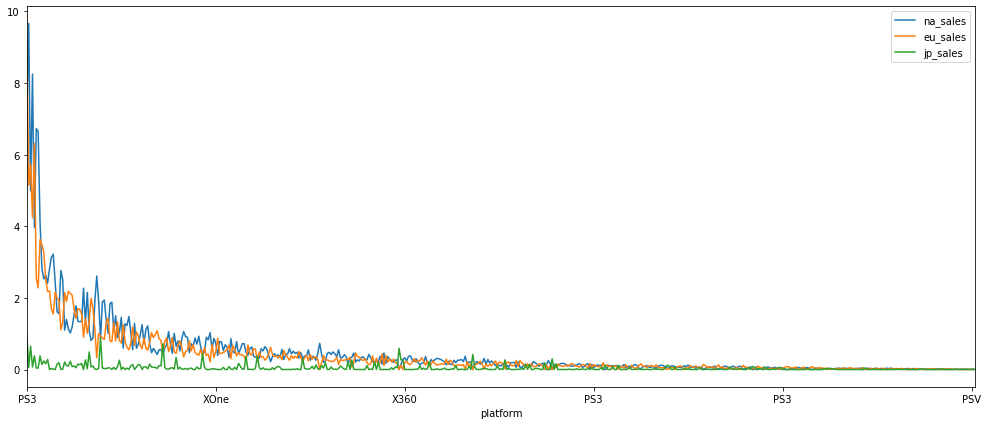

In [376]:
rating_m = (
    actual_years
    .query('rating == "M"')
    .plot(x = 'platform', y = ['na_sales', 'eu_sales', 'jp_sales'], figsize = (17, 7))
)

##### Рейтинг E

In [348]:
rating_e = (
    actual_years
    .query('rating == "E"')
)

In [349]:
rating_e['na_sales'].corr(rating_e['all_sales'])

0.7726387380895886

In [350]:
rating_e['eu_sales'].corr(rating_e['all_sales'])

0.8688015067069107

In [351]:
rating_e['jp_sales'].corr(rating_e['all_sales'])

0.5960322232064075

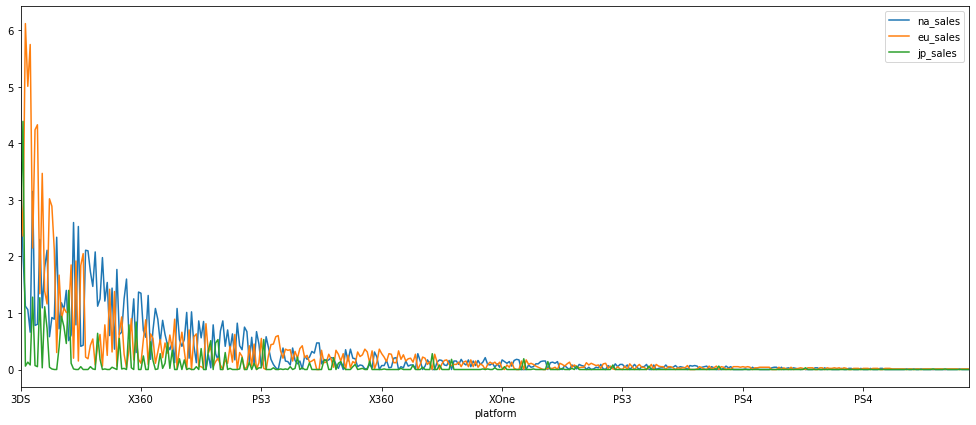

In [375]:
rating_e = (
    actual_years
    .query('rating == "E"')
    .plot(x = 'platform', y = ['na_sales', 'eu_sales', 'jp_sales'], figsize = (17, 7))
)

##### Рейтинг T

In [352]:
rating_t = (
    actual_years
    .query('rating == "T"')
)

In [353]:
rating_t['na_sales'].corr(rating_t['all_sales'])

0.9377965952652675

In [354]:
rating_t['eu_sales'].corr(rating_t['all_sales'])

0.9352211192658311

In [355]:
rating_t['jp_sales'].corr(rating_t['all_sales'])

0.3150184317471207

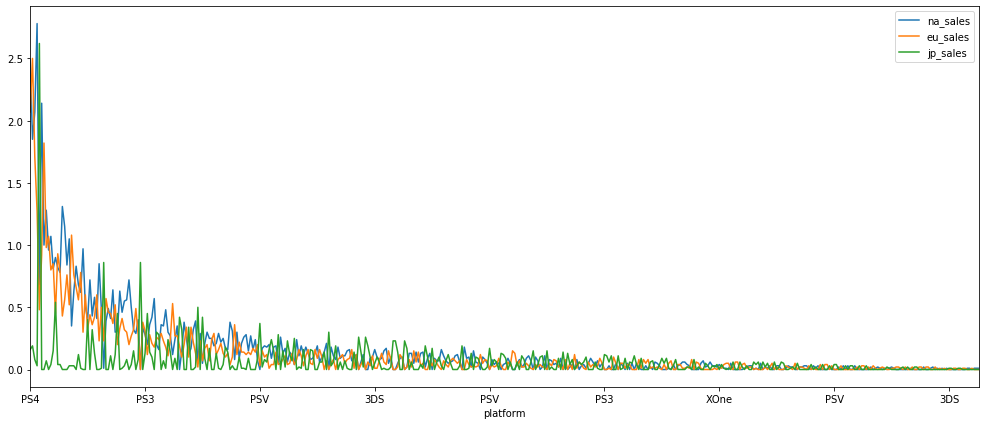

In [374]:
rating_t = (
    actual_years
    .query('rating == "T"')
    .plot(x = 'platform', y = ['na_sales', 'eu_sales', 'jp_sales'], figsize = (17, 7))
)

##### Рейтинг E10+

In [356]:
rating_e10 = (
    actual_years
    .query('rating == "E10+"')
)

In [357]:
rating_e10['na_sales'].corr(rating_e10['all_sales'])

0.9606848935426565

In [358]:
rating_e10['eu_sales'].corr(rating_e10['all_sales'])

0.9210529792540203

In [359]:
rating_e10['jp_sales'].corr(rating_e10['all_sales'])

0.41593228826029804

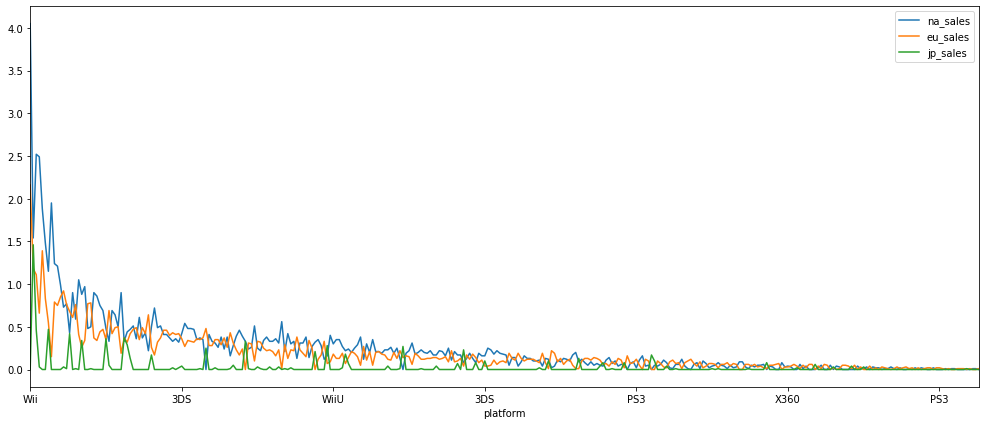

In [373]:
rating_e10 = (
    actual_years
    .query('rating == "E10+"')
    .plot(x = 'platform', y = ['na_sales', 'eu_sales', 'jp_sales'], figsize = (17, 7))
)

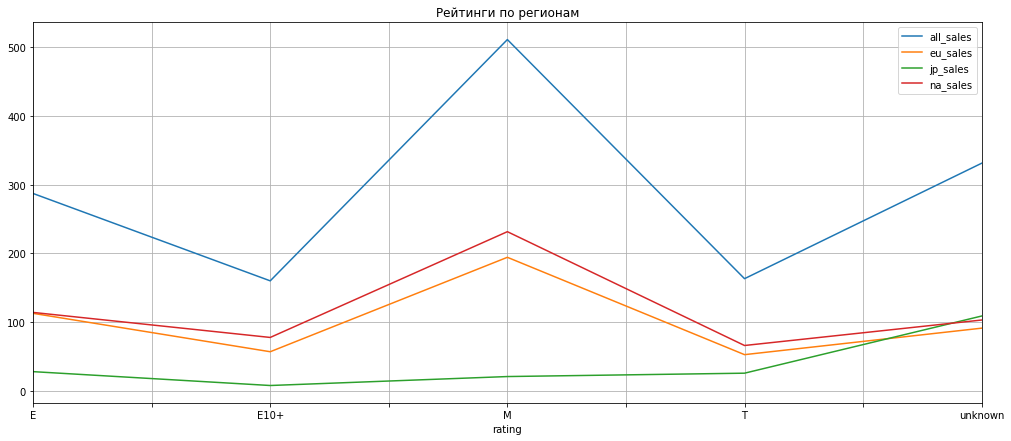

In [360]:
(
    rating_all
    .pivot_table(index = 'rating', values = ['all_sales', 'na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')
    .plot(figsize = (17, 7), grid = True, title = 'Рейтинги по регионам')
)


В Северной Америке и Европе рейтинг влияет на продажи, в Японии нет.

[Home](#Оглавление)

<a name="Шаг_5"></a>

### Гипотезы

<a name="Шаг_5.1"></a>

#### A. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Нулевая гипотеза гласит : "Средние пользовательские рейтинги платформ Xbox One и PC равны" 

Альтернативная гипотеза гласит: "Средние пользовательские рейтинги платформ Xbox One и PC различны"

In [377]:
actual_years.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


In [385]:
platform_xone = (
    actual_years
    .query('platform == "XOne" and user_score != -1')


)

In [391]:
platform_xone.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88,6.2,M,4.22
373,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72,4.1,M,3.50


In [392]:
platform_pc = (
    actual_years
    .query('platform == "PC" and user_score != -1')
    

)

In [393]:
platform_pc.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
192,Diablo III,PC,2012,Role-Playing,2.44,2.16,0.0,0.54,88,4.0,M,5.14
458,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70,3.9,T,3.05
688,Guild Wars 2,PC,2012,Action,0.96,1.07,0.0,0.27,90,7.9,T,2.30
959,World of Warcraft: Mists of Pandaria,PC,2012,Role-Playing,0.84,0.76,0.0,0.22,82,4.8,T,1.82
1095,StarCraft II: Heart of the Swarm,PC,2013,Strategy,0.83,0.66,0.0,0.18,86,7.9,T,1.67


In [394]:
disp_xone = np.var(platform_xone['user_score'], ddof=1)

In [397]:
disp_xone

1.9069968429360695

In [395]:
disp_pc = np.var(platform_pc['user_score'], ddof=1)

In [398]:
disp_pc

2.747158203565786

In [396]:
alpha = 0.05

In [399]:
results_platform = st.ttest_ind(platform_xone['user_score'], platform_pc['user_score'], equal_var = False)

In [400]:
results_platform

Ttest_indResult(statistic=0.49534296176885134, pvalue=0.6206366351489678)

In [401]:
if (results_platform.pvalue < alpha):
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу")

'Не получилось отвергнуть нулевую гипотезу'

Гипотезу о равенстве средних рейтингов на платформы Xbox One и PC отвергнуть не получилось.

[Home](#Оглавление)

<a name="Шаг_5.2"></a>

#### B. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза гласит : "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны"

Альтернативная гипотеза гласит: "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не равны"

In [403]:
genre_action = (
    actual_years
    .query('genre == "Action" and user_score != -1')
    

)

In [407]:
genre_action.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
81,FIFA Soccer 13,PS3,2012,Action,1.06,5.01,0.13,1.97,88,6.6,E,8.17
127,Assassin's Creed III,PS3,2012,Action,2.64,2.52,0.16,1.12,85,6.9,M,6.44


In [405]:
genre_sports = (
    actual_years
    .query('genre == "Sports" and user_score != -1')


)

In [408]:
genre_sports.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86,4.3,E,6.46
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82,5.7,E,6.08
264,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,-1,4.5,E,4.28


In [409]:
disp_action = np.var(genre_action['user_score'], ddof=1)

In [410]:
disp_action

1.8819173506733466

In [411]:
disp_sports = np.var(genre_sports['user_score'], ddof=1)

In [412]:
disp_sports

3.022890298704732

In [413]:
alpha = 0.05

In [415]:
results_genre = st.ttest_ind(genre_action['user_score'], genre_sports['user_score'], equal_var = False)

In [416]:
results_genre

Ttest_indResult(statistic=9.987691690568777, pvalue=2.337200239591976e-20)

In [417]:
if (results_genre.pvalue < alpha):
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу")

'Отвергаем нулевую гипотезу'

Гипотезу о равенстве средних рейтингов по жанрам  Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») отвергаем. Следовательно пользуемся альтернативной. "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не равны"

[Home](#Оглавление)

<a name="Шаг_6"></a>

###  Общий вывод

Исходя из представленных данных, выявлены следующие закономерности.
Для начала стоит определиться с платформой.

1. Платформы по регионам.

  Топ 5 платформ в Северной Америке
  
   - 1 X360
   - 2 PS4
   - 3 PS3
   - 4 XOne
   - 5 3DS
 
  Топ 5 платформ в Европе
  
   - 1 PS4
   - 2 PS3
   - 3 X360    
   - 4 XOne    
   - 5 3DS
 
  Топ 5 платформ в Японии
  
   - 1 3DS
   - 2 PS3
   - 3 PSV
   - 4 PS4
   - 5 WiiU

После выбора платформы стоит учесть жанр.
2. Топ Жанры по регионам

  Северная Америка
  
   - Shooter 47.5 %
   - Sports 45.0 %
   - Misc 44.8 %
   - Fighting 44.5 %
   - Platform 41.6 %
 
  Европа 

   - Racing 51.0 %
   - Simulation 41.2 %
   - Strategy 38.8 %
   - Sports 38.2 %
   - Shooter 37.2 %
   
  Япония

   - Puzzle 43.8 %
   - Role-Playing 33.9 %
   - Simulation 29.5 %
   - Adventure 28.0 %
   - Strategy 21.6 %
   
Исходя из выбранной платформы и жанра стоит рассчитывать рекламную кампанию для каждого региона.
Например Shooter на X360 в Северной Америке.

Так же стоит учитывать основные продажи по каждой платформе происходят в течение 11 - 11,5 лет. И не игнориовать пиратские копии и BitTorrent (протокол). 

Связь с оценками критиков слабая (стоит обратить внимание), с оценками пользователей очень слабая (можно внимания не обращать).

Ршение по выдвинутым ранее гипотезам:

Гипотезу о равенстве средних рейтингов на платформы Xbox One и PC отвергнуть не получилось

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не равны


[Home](#Оглавление)